# NBA Draft Data Cleaning

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pull CSV
players_df = pd.read_csv("Resources/players.csv")
players_df.head()

,index,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [3]:
# Pull names of all columns for reference
players_df.columns

Index(['index', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')

In [4]:
# Print unique number of players
print(len(players_df["_id"].unique()))

4685


In [5]:
# Clean up misspelled and duplicated data
players_df["draft_round"] = players_df["draft_round"].replace(
    {
        '2nd roun': '2nd round',
        '3rd roun': '3rd round',
        '4th roun': '4th round',
        '5th roun': '5th round',
        '6th roun': '6th round',
        '7th roun': '7th round',
        '8th roun': '8th round',
        '9th roun': '9th round',
        '10th roun': '10th round',
        "1948 BAA Draf": "1948 BAA Draft",
        "1947 BAA Draf": "1947 BAA Draft",
        "1952 NBA Draf": "1952 NBA Draft",
        "1956 NBA Draf": "1956 NBA Draft",
        "1953 NBA Draf": "1953 NBA Draft",
        "1949 BAA Draf": "1949 BAA Draft",
        "1955 NBA Draf": "1955 NBA Draft" 
        
        
    }
)

In [6]:
# Check that renaming worked
players_df["draft_round"].value_counts()

draft_round
1st round                                             1433
2nd round                                             1052
3rd round                                              283
4th round                                              171
5th round                                              102
6th round                                               72
7th round                                               69
8th round                                               59
1948 BAA Draft                                          39
9th round                                               31
1947 BAA Draft                                          26
10th round                                              26
1952 NBA Draft                                          24
1956 NBA Draft                                          19
11th round                                              18
12th round                                              16
1953 NBA Draft                              

In [7]:
# Create column for career points scored
players_df["career_pts_total"] = players_df["career_G"] * players_df['career_PTS']
players_df["career_pts_total"] = players_df["career_pts_total"].astype(int)

In [8]:
# Drop columns we won't be looking at
clean_players_df = players_df[["name", "birthDate", "position", 'college','draft_year', 'draft_round', 'draft_pick', 'career_G', 'career_PTS', 'career_pts_total', 'birthPlace', '_id' ]]
clean_players_df

,name,birthDate,position,college,draft_year,draft_round,draft_pick,career_G,career_PTS,career_pts_total,birthPlace,_id
0,Alaa Abdelnaby,"June 24, 1968",Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,"Cairo, Egypt",abdelal01
1,Zaid Abdul-Aziz,"April 7, 1946",Power Forward and Center,Iowa State University,1968,1st round,5th overall,505,9.0,4545,"Brooklyn, New York",abdulza01
2,Kareem Abdul-Jabbar,"April 16, 1947",Center,"University of California, Los Angeles",1969,1st round,1st overall,1560,24.6,38376,"New York, New York",abdulka01
3,Mahmoud Abdul-Rauf,"March 9, 1969",Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,"Gulfport, Mississippi",abdulma02
4,Tariq Abdul-Wahad,"November 3, 1974",Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,"Maisons Alfort, France",abdulta01
...,...,...,...,...,...,...,...,...,...,...,...,...
4680,Ante Zizic,"January 4, 1997",Center,NaN,2016,1st round,23rd overall,91,6.4,582,"Split, Croatia",zizican01
4681,Jim Zoet,"December 20, 1953",Center,Kent State University,NaN,NaN,NaN,7,0.3,2,"Uxbridge, Canada",zoetji01
4682,Bill Zopf,"June 7, 1948",Point Guard,Duquesne University,1970,2nd round,33rd overall,53,2.2,116,NaN,zopfbi01
4683,Ivica Zubac,"March 18, 1997",Center,NaN,2016,2nd round,32nd overall,140,6.9,966,"Mostar, Bosnia and Herzegovina",zubaciv01


In [9]:
# Rename columns
clean_players_df.columns = ['Name', 'Birth Date', 'Position', 'College', "Draft Year", "Draft Round", "Draft Pick", "Career Games Played", "Career Points Per Game", "Total Career Points", "Birthplace", "_id"]
clean_players_df

,Name,Birth Date,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birthplace,_id
0,Alaa Abdelnaby,"June 24, 1968",Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,"Cairo, Egypt",abdelal01
1,Zaid Abdul-Aziz,"April 7, 1946",Power Forward and Center,Iowa State University,1968,1st round,5th overall,505,9.0,4545,"Brooklyn, New York",abdulza01
2,Kareem Abdul-Jabbar,"April 16, 1947",Center,"University of California, Los Angeles",1969,1st round,1st overall,1560,24.6,38376,"New York, New York",abdulka01
3,Mahmoud Abdul-Rauf,"March 9, 1969",Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,"Gulfport, Mississippi",abdulma02
4,Tariq Abdul-Wahad,"November 3, 1974",Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,"Maisons Alfort, France",abdulta01
...,...,...,...,...,...,...,...,...,...,...,...,...
4680,Ante Zizic,"January 4, 1997",Center,NaN,2016,1st round,23rd overall,91,6.4,582,"Split, Croatia",zizican01
4681,Jim Zoet,"December 20, 1953",Center,Kent State University,NaN,NaN,NaN,7,0.3,2,"Uxbridge, Canada",zoetji01
4682,Bill Zopf,"June 7, 1948",Point Guard,Duquesne University,1970,2nd round,33rd overall,53,2.2,116,NaN,zopfbi01
4683,Ivica Zubac,"March 18, 1997",Center,NaN,2016,2nd round,32nd overall,140,6.9,966,"Mostar, Bosnia and Herzegovina",zubaciv01


In [10]:
# Filter data to beginning of modern era (1980)
modern_era_df = clean_players_df.loc[clean_players_df["Draft Year"] > "1985"]
modern_era_df.reset_index(drop=True, inplace=True)
modern_era_df

,Name,Birth Date,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birthplace,_id
0,Alaa Abdelnaby,"June 24, 1968",Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,"Cairo, Egypt",abdelal01
1,Mahmoud Abdul-Rauf,"March 9, 1969",Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,"Gulfport, Mississippi",abdulma02
2,Tariq Abdul-Wahad,"November 3, 1974",Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,"Maisons Alfort, France",abdulta01
3,Shareef Abdur-Rahim,"December 11, 1976",Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,"Marietta, Georgia",abdursh01
4,Alex Abrines,"August 1, 1993",Shooting Guard,NaN,2013,2nd round,32nd overall,174,5.3,922,"Palma de Mallorca, Spain",abrinal01
...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Derrick Zimmerman,"December 2, 1981",Point Guard,Mississippi State University,2003,2nd round,40th overall,2,2.0,4,"Monroe, Louisiana",zimmede01
1675,Stephen Zimmerman,"September 9, 1996",Center,"University of Nevada, Las Vegas",2016,2nd round,41st overall,19,1.2,22,"Hendersonville, Tennessee",zimmest01
1676,Paul Zipser,"February 18, 1994",Small Forward,NaN,2016,2nd round,48th overall,98,4.7,460,"Heidelberg, Germany",zipsepa01
1677,Ante Zizic,"January 4, 1997",Center,NaN,2016,1st round,23rd overall,91,6.4,582,"Split, Croatia",zizican01


In [11]:
# Check for null values
modern_era_df.isnull().sum()

Name                        0
Birth Date                  0
Position                    0
College                   219
Draft Year                  0
Draft Round                 0
Draft Pick                  0
Career Games Played         0
Career Points Per Game      0
Total Career Points         0
Birthplace                  0
_id                         0
dtype: int64

In [12]:
# Fill null values for players that didn't attend college
modern_era_df["College"].fillna('No college', inplace=True)

In [13]:
# Check that null fill worked
modern_era_df.isnull().sum()

Name                      0
Birth Date                0
Position                  0
College                   0
Draft Year                0
Draft Round               0
Draft Pick                0
Career Games Played       0
Career Points Per Game    0
Total Career Points       0
Birthplace                0
_id                       0
dtype: int64

In [14]:
# Check draft year column for strange values
modern_era_df["Draft Year"].value_counts()

Draft Year
1986    67
1988    58
2012    56
1998    56
1987    55
2005    55
2011    54
2016    54
2014    53
2017    53
2018    53
1990    52
2006    52
2010    51
2008    51
2013    51
2000    50
1995    50
2009    50
2007    49
2001    49
2002    48
1992    48
1989    48
2003    47
1996    47
1997    47
2004    46
1999    46
1994    45
1991    44
2015    44
1993    43
1st      3
2nd      3
8th      1
Name: count, dtype: int64

In [15]:
# Check strange values to see if they should be included in Dataset or not
first = modern_era_df[(modern_era_df["Draft Year"] == "1st ")]
second = modern_era_df[(modern_era_df["Draft Year"] == "2nd ")]
eighth = modern_era_df[(modern_era_df["Draft Year"] == "8th ")]

In [16]:
# Drop strange values as they were drafted outside scope of dataset
modern_era_df.drop(first.index, inplace=True)
modern_era_df.drop(second.index, inplace=True)
modern_era_df.drop(eighth.index, inplace=True)

In [17]:
# Check draft year column for strange values
modern_era_df["Draft Year"].value_counts()

Draft Year
1986    67
1988    58
2012    56
1998    56
1987    55
2005    55
2016    54
2011    54
2018    53
2014    53
2017    53
1990    52
2006    52
2010    51
2008    51
2013    51
1995    50
2000    50
2009    50
2001    49
2007    49
1989    48
2002    48
1992    48
2003    47
1997    47
1996    47
2004    46
1999    46
1994    45
2015    44
1991    44
1993    43
Name: count, dtype: int64

In [18]:
# Split birthdate and birthplace column for sorting
modern_era_df[["Date", "Year"]] = modern_era_df["Birth Date"].str.split(",", expand = True)
modern_era_df[["Month", "Day"]] = modern_era_df["Date"].str.split(" ", expand = True)
modern_era_df[["Birth City", "Birth State/Country"]] = modern_era_df["Birthplace"].str.split(",", expand = True)
modern_era_df

,Name,Birth Date,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birthplace,_id,Date,Year,Month,Day,Birth City,Birth State/Country
0,Alaa Abdelnaby,"June 24, 1968",Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,"Cairo, Egypt",abdelal01,June 24,1968,June,24,Cairo,Egypt
1,Mahmoud Abdul-Rauf,"March 9, 1969",Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,"Gulfport, Mississippi",abdulma02,March 9,1969,March,9,Gulfport,Mississippi
2,Tariq Abdul-Wahad,"November 3, 1974",Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,"Maisons Alfort, France",abdulta01,November 3,1974,November,3,Maisons Alfort,France
3,Shareef Abdur-Rahim,"December 11, 1976",Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,"Marietta, Georgia",abdursh01,December 11,1976,December,11,Marietta,Georgia
4,Alex Abrines,"August 1, 1993",Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,"Palma de Mallorca, Spain",abrinal01,August 1,1993,August,1,Palma de Mallorca,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Derrick Zimmerman,"December 2, 1981",Point Guard,Mississippi State University,2003,2nd round,40th overall,2,2.0,4,"Monroe, Louisiana",zimmede01,December 2,1981,December,2,Monroe,Louisiana
1675,Stephen Zimmerman,"September 9, 1996",Center,"University of Nevada, Las Vegas",2016,2nd round,41st overall,19,1.2,22,"Hendersonville, Tennessee",zimmest01,September 9,1996,September,9,Hendersonville,Tennessee
1676,Paul Zipser,"February 18, 1994",Small Forward,No college,2016,2nd round,48th overall,98,4.7,460,"Heidelberg, Germany",zipsepa01,February 18,1994,February,18,Heidelberg,Germany
1677,Ante Zizic,"January 4, 1997",Center,No college,2016,1st round,23rd overall,91,6.4,582,"Split, Croatia",zizican01,January 4,1997,January,4,Split,Croatia


In [19]:
# Re-order columns after reformatting birthdate column
modern_era_dates = modern_era_df[['_id', 'Name', 'Month', 'Day', 'Year', 'Position',
                                  'College', "Draft Year", "Draft Round", "Draft Pick", 
                                  "Career Games Played", "Career Points Per Game", 
                                  "Total Career Points", "Birth City", 
                                  "Birth State/Country"]]
modern_era_dates

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,zimmede01,Derrick Zimmerman,December,2,1981,Point Guard,Mississippi State University,2003,2nd round,40th overall,2,2.0,4,Monroe,Louisiana
1675,zimmest01,Stephen Zimmerman,September,9,1996,Center,"University of Nevada, Las Vegas",2016,2nd round,41st overall,19,1.2,22,Hendersonville,Tennessee
1676,zipsepa01,Paul Zipser,February,18,1994,Small Forward,No college,2016,2nd round,48th overall,98,4.7,460,Heidelberg,Germany
1677,zizican01,Ante Zizic,January,4,1997,Center,No college,2016,1st round,23rd overall,91,6.4,582,Split,Croatia


In [20]:
# Push clean csv files
filepath = Path('Resources/cleaned_draft_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
modern_era_dates.to_csv(filepath, index=False) 

# NBA Salary Data Cleaning

In [21]:
# Dependencies and Setup
import pandas as pd 
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Pull CSV
salary_df = pd.read_csv("Resources/salaries_1985to2018.csv")
salary_df.head()

,index,league,player_id,salary,season,season_end,season_start,team
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [22]:
# Pull CSV
salary_df = pd.read_csv("Resources/salaries_1985to2018.csv")
salary_df.head()

,index,league,player_id,salary,season,season_end,season_start,team
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [23]:
# Create DATE column for merging later
salary_df["DATE"] = pd.to_datetime(salary_df["season_start"].astype(str)+ "-01-01")
salary_df.head()

,index,league,player_id,salary,season,season_end,season_start,team,DATE
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers,1990-01-01
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers,1991-01-01
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics,1992-01-01
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics,1993-01-01
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings,1994-01-01


In [24]:
# Print unique players
print(len(salary_df["player_id"].unique()))

2408


# Adjusting for Inflation
All inflation rate is as of 09/01/2023

In [25]:
# Pull CPI CSV to adjust for inflation
cpi_data = pd.read_csv('Resources/CPIAUCNS.csv')
cpi_data.head()

,DATE,CPIAUCNS
0,1913-01-01,9.8
1,1913-02-01,9.8
2,1913-03-01,9.8
3,1913-04-01,9.8
4,1913-05-01,9.7


In [26]:
# Create new column to adjust each year to Sep. 01 2023
cpi_data['CPI_rate'] = cpi_data['CPIAUCNS'].iloc[-1]/cpi_data['CPIAUCNS']
cpi_data['DATE'] = pd.to_datetime(cpi_data['DATE'])
cpi_data.head()

,DATE,CPIAUCNS,CPI_rate
0,1913-01-01,9.8,31.407041
1,1913-02-01,9.8,31.407041
2,1913-03-01,9.8,31.407041
3,1913-04-01,9.8,31.407041
4,1913-05-01,9.7,31.730825


In [27]:
# Create Inflation Adjusted Salary column
total_salary2 = pd.merge(salary_df, cpi_data, how="left", on="DATE")
total_salary2['inflation_adjusted_salary'] = total_salary2["salary"] * total_salary2["CPI_rate"]
total_salary2.head()

,index,league,player_id,salary,season,season_end,season_start,team,DATE,CPIAUCNS,CPI_rate,inflation_adjusted_salary
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers,1990-01-01,127.4,2.415926,9.542909e+05
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers,1991-01-01,134.6,2.286694,1.129627e+06
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics,1992-01-01,138.1,2.228740,1.114370e+06
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics,1993-01-01,142.6,2.158408,1.737519e+06
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings,1994-01-01,146.2,2.105260,1.368419e+06


In [28]:
# Drop unnecessary columns
total_salary2 = total_salary2[['player_id', 'salary', 'inflation_adjusted_salary']]
total_salary2.head()

,player_id,salary,inflation_adjusted_salary
0,abdelal01,395000,9.542909e+05
1,abdelal01,494000,1.129627e+06
2,abdelal01,500000,1.114370e+06
3,abdelal01,805000,1.737519e+06
4,abdelal01,650000,1.368419e+06


In [29]:
# Group by player id and the sum of salary and inflation-adjusted salary
player_salary = total_salary2.groupby(['player_id']).sum()
player_salary.head()

,salary,inflation_adjusted_salary
player_id,,
abdelal01,2844000,6.304225e+06
abdulka01,8560000,2.406022e+07
abdulma02,19849500,4.177226e+07
abdulta01,37982800,6.558494e+07
abdursh01,95866000,1.630366e+08


In [30]:
# Print total rows
player_salary.count()

salary                       2408
inflation_adjusted_salary    2408
dtype: int64

In [31]:
# Rename player id and salary for merging
player_salary.index.rename("_id", inplace=True)
player_salary.rename(columns={"salary": "Total Earnings", "inflation_adjusted_salary": "Inflation-Adjusted Earnings"}, inplace=True)
player_salary

,Total Earnings,Inflation-Adjusted Earnings
_id,,
abdelal01,2844000,6.304225e+06
abdulka01,8560000,2.406022e+07
abdulma02,19849500,4.177226e+07
abdulta01,37982800,6.558494e+07
abdursh01,95866000,1.630366e+08
...,...,...
zidekge01,2081200,4.135382e+06
zimmest01,950000,1.234191e+06
zipsepa01,2062611,2.638045e+06


In [32]:
# Create Salary DataFrame with readable salaries
player_salary2 = player_salary.copy()
player_salary2["Total Earnings"] = player_salary2["Total Earnings"].map("${:,.2f}".format)
player_salary2["Inflation-Adjusted Earnings"] = player_salary2["Inflation-Adjusted Earnings"].map("${:,.2f}".format)
player_salary2.head()

,Total Earnings,Inflation-Adjusted Earnings
_id,,
abdelal01,"$2,844,000.00","$6,304,225.16"
abdulka01,"$8,560,000.00","$24,060,224.72"
abdulma02,"$19,849,500.00","$41,772,255.61"
abdulta01,"$37,982,800.00","$65,584,943.25"
abdursh01,"$95,866,000.00","$163,036,582.98"


In [33]:
# Push clean csv files
filepath = Path('Resources/cleaned_salary_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
player_salary.to_csv(filepath)

In [34]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as mcolors

In [35]:
# Pull NBA draft CSV
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [36]:
# Pull NBA salary CSV
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [37]:
# Merge data
full_data = pd.merge(draft_data, salaries, on="_id")

In [38]:
# Convert the 'Draft Pick' column to only include the numeric values
full_data['Draft Number'] = full_data['Draft Pick'].str.extract('(\d+)').astype(float)

In [39]:
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings,Draft Number
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06,25.0
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07,3.0
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07,11.0
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08,3.0
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07,32.0


In [40]:
# Print total number of rows
full_data.count()

_id                            1535
Name                           1535
Month                          1535
Day                            1535
Year                           1535
Position                       1535
College                        1535
Draft Year                     1535
Draft Round                    1535
Draft Pick                     1535
Career Games Played            1535
Career Points Per Game         1535
Total Career Points            1535
Birth City                     1535
Birth State/Country            1532
Total Earnings                 1535
Inflation-Adjusted Earnings    1535
Draft Number                   1535
dtype: int64

## Which draft position produces the highest average career earnings?

In [41]:
# Group data by draft position and sort by highest average career earnings
draft_pick_data = full_data.groupby(["Draft Number", "Draft Pick"])
draft_earnings = draft_pick_data["Total Earnings"].mean()
draft_earnings = draft_earnings.reset_index("Draft Number", drop=True)

sorted_draft_earnings = draft_earnings.sort_values(ascending=False)
display(draft_earnings.head())

Draft Pick
1st overall    9.717674e+07
2nd overall    7.384961e+07
3rd overall    7.455684e+07
4th overall    6.971601e+07
5th overall    7.123789e+07
Name: Total Earnings, dtype: float64

In [42]:
# Find the draft position with the highest average career earnings
highest_value = "${:,.2f}".format(sorted_draft_earnings.iloc[0])
print(f"The draft position that produces the highest average earnings is: {sorted_draft_earnings.index[0]} with a total of {highest_value}")

The draft position that produces the highest average earnings is: 1st overall with a total of $97,176,741.09


## Which draft position produces the highest average career earnings adjusted to Sep. 1st 2023 inflation?

In [43]:
# Repeating for inflaion-adjusted earnings
draft_earnings_adjusted = draft_pick_data["Inflation-Adjusted Earnings"].mean()
draft_earnings_adjusted = draft_earnings_adjusted.reset_index("Draft Number", drop=True)
sorted_draft_earnings_adjusted = draft_earnings_adjusted.sort_values(ascending=False)
#display(draft_earnings_adjusted.head())

# Find the draft position with the highest average career earnings adjusted to Sep. 1st 2023 inflation
highest_value = "${:,.2f}".format(sorted_draft_earnings_adjusted.iloc[0])
print(f"The draft position that produces the highest average inflation-adjusted earnings is: {sorted_draft_earnings_adjusted.index[0]} with a total of {highest_value}")

The draft position that produces the highest average inflation-adjusted earnings is: 1st overall with a total of $152,115,203.00


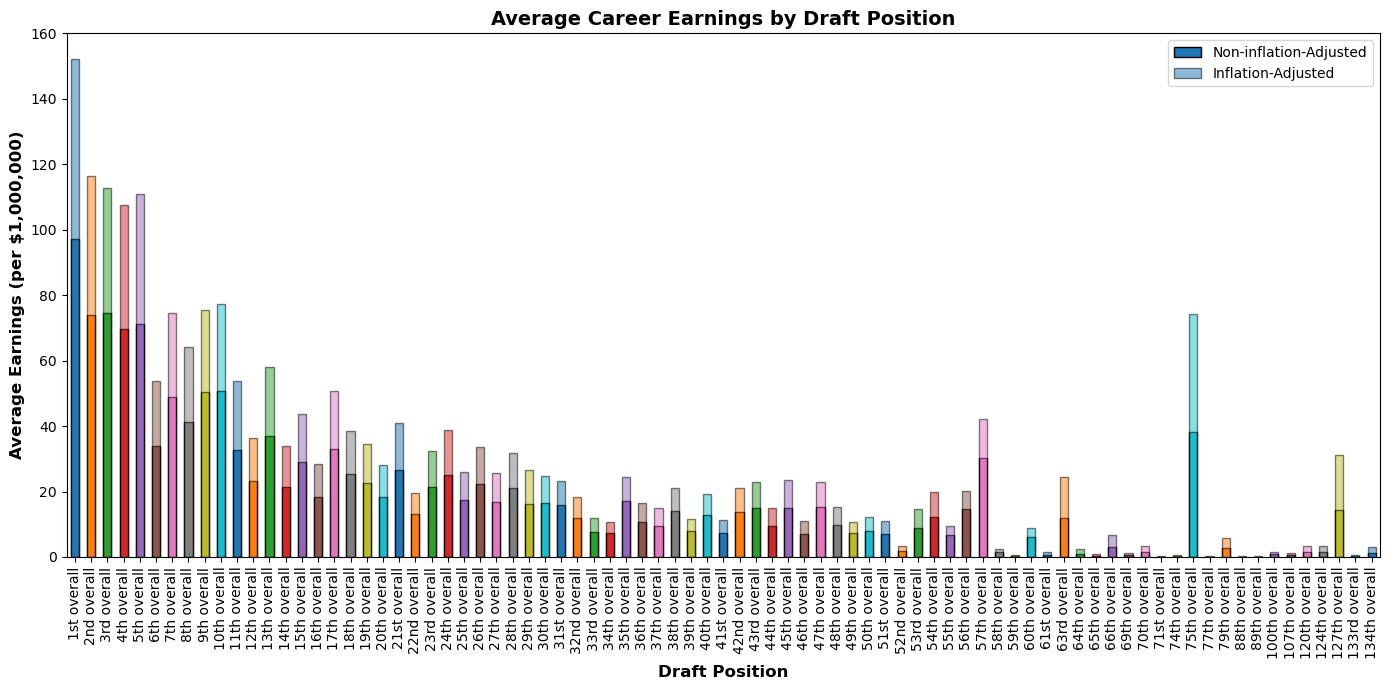

In [44]:
#Average Career Earnings by Draft Position (Non-inflation-Adjusted vs Inflation-Adjusted)
plt.figure(figsize=(14, 7))
draft_earnings.plot(kind='bar', color=mcolors.TABLEAU_COLORS, edgecolor='black')
draft_earnings_adjusted.plot(kind='bar', color=mcolors.TABLEAU_COLORS, edgecolor='black', alpha=0.5)
plt.title('Average Career Earnings by Draft Position', size=14, weight='bold')
plt.xlabel('Draft Position', size=12, weight='bold')
plt.xticks(rotation=90)
plt.ylabel('Average Earnings (per $1,000,000)', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.legend(labels = ["Non-inflation-Adjusted", "Inflation-Adjusted"])
plt.tight_layout()
plt.savefig("Resources/draft_position_earnings.png", bbox_inches='tight')
plt.show()

## Compare average career earnings of different round picks

In [45]:
# Group data by draft rounds and find the average career earnings
round_earnings = full_data.groupby("Draft Round")["Total Earnings"].mean()
display(round_earnings)

Draft Round
1st round    3.682607e+07
2nd round    1.113917e+07
3rd round    4.266847e+06
4th round    6.946208e+06
5th round    6.161250e+05
6th round    3.822300e+06
Name: Total Earnings, dtype: float64

In [46]:
# Find the draft round with the highest average career earnings
sorted_round_earnings = round_earnings.sort_values(ascending=False)
highest_value = "${:,.2f}".format(sorted_round_earnings.iloc[0])
print(f"The draft round that produces the highest average earnings is: {sorted_round_earnings.index[0]} with a total of {highest_value}")

The draft round that produces the highest average earnings is: 1st round with a total of $36,826,065.39


## Compare average career earnings of different round picks adjusted to Sep. 1st 2023 inflation

In [47]:
# Repeating for inflaion-adjusted earnings
round_earnings_adjusted = full_data.groupby("Draft Round")["Inflation-Adjusted Earnings"].mean()
sorted_round_earnings_adjusted = round_earnings_adjusted.sort_values(ascending=False)
#display(round_earnings_adjusted)

# Find the draft round with the highest average career earnings adjusted to Sep. 1st 2023 inflation
highest_value = "${:,.2f}".format(sorted_round_earnings_adjusted.iloc[0])
print(f"The draft round that produces the highest average inflation-adjusted earnings is: {sorted_round_earnings_adjusted.index[0]} with a total of {highest_value}")

The draft round that produces the highest average inflation-adjusted earnings is: 1st round with a total of $56,720,447.36


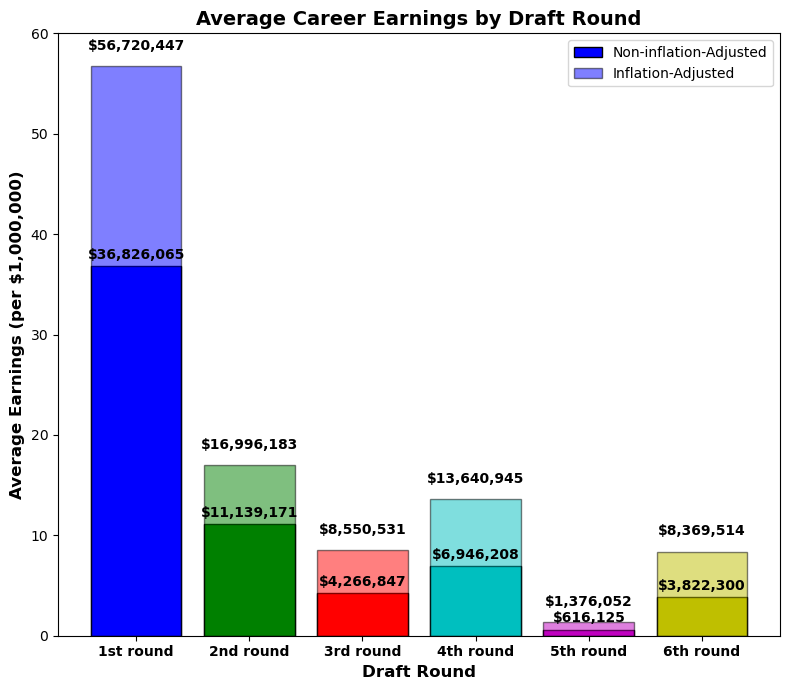

In [48]:
#Average Career Earnings by Draft Round (Non-inflation-Adjusted vs Inflation-Adjusted)
fig, ax = plt.subplots(figsize=(8, 7))
bar_container = ax.bar(round_earnings.index, round_earnings, color=mcolors.BASE_COLORS, edgecolor='black')
ax.bar_label(bar_container, fmt='${:,.0f}', weight='bold', padding=3)
bar_container2 = ax.bar(round_earnings_adjusted.index, round_earnings_adjusted, color=mcolors.BASE_COLORS, edgecolor='black', alpha=0.5)
ax.bar_label(bar_container2, fmt='${:,.0f}', weight='bold', padding=9.5)

plt.title('Average Career Earnings by Draft Round', size=14, weight='bold')
plt.xlabel('Draft Round', size=12, weight='bold')
plt.ylabel('Average Earnings (per $1,000,000)', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 10) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.xticks(rotation=0, weight='bold')
plt.legend(labels = ["Non-inflation-Adjusted", "Inflation-Adjusted"])
plt.tight_layout()
plt.savefig("Resources/draft_round_earnings.png", bbox_inches='tight')
plt.show()

## Which draft year produces the highest average career earnings?

In [49]:
# Group data by draft year and sort by highest average career earnings
draft_year_data = full_data.groupby("Draft Year")
draft_year_earnings = draft_year_data['Total Earnings'].mean()
highest_draft_year_earnings = draft_year_earnings.sort_values(ascending=False)
highest_draft_year_earnings.head()

Draft Year
1996    4.991753e+07
2003    4.749541e+07
2001    4.710546e+07
2008    4.106275e+07
1999    4.076935e+07
Name: Total Earnings, dtype: float64

In [50]:
# Find the draft year with the highest average career earnings
highest_value = "${:,.2f}".format(highest_draft_year_earnings.iloc[0])
print(f"The draft year that produces the highest average earnings is: {highest_draft_year_earnings.index[0]} with a total of {highest_value}")

The draft year that produces the highest average earnings is: 1996 with a total of $49,917,527.09


## Which draft year produces the highest average career earnings adjusted to Sep. 1st 2023 inflation?

In [51]:
# Group data by draft year and sort by highest average career earnings adjusted to Sep. 1st 2023 inflation
draft_year_earnings_adjusted = draft_year_data['Inflation-Adjusted Earnings'].mean()
highest_draft_year_earnings_adjusted = draft_year_earnings_adjusted.sort_values(ascending=False)
#display(highest_draft_year_earnings_adjusted.head())

# Find the draft year with the highest average career earnings adjusted to Sep. 1st 2023 inflation
highest_value = "${:,.2f}".format(highest_draft_year_earnings_adjusted.iloc[0])
print(f"The draft year that produces the highest adjusted average inflation-adjusted earnings is: {highest_draft_year_earnings_adjusted.index[0]} with a total of {highest_value}")

The draft year that produces the highest adjusted average inflation-adjusted earnings is: 1996 with a total of $80,967,181.07


In [52]:
# Create a helper function to convert "−" into "-" to avoid float-conversion issue
def convert(num):
    if num[0] == "−":
        result = num.replace("−", "-")
    else:
        result = num
    return result

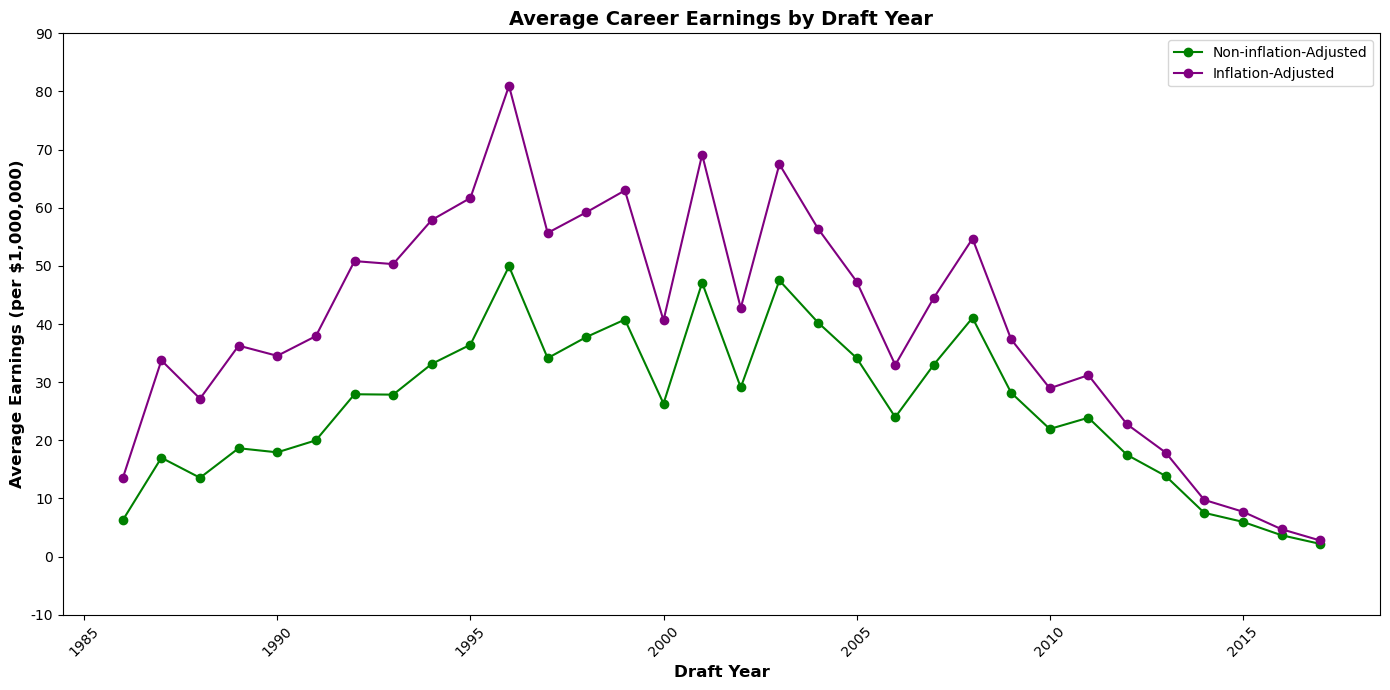

In [53]:
#Average Career Earnings by Draft Year (Non-inflation-Adjusted vs Inflation-Adjusted)
plt.figure(figsize=(14, 7))
draft_year_earnings.plot(kind='line', marker='o', color='green')
draft_year_earnings_adjusted.plot(kind='line', marker='o', color='purple')
plt.title('Average Career Earnings by Draft Year', size=14, weight='bold')
plt.xlabel('Draft Year', size=12, weight='bold')
plt.ylabel('Average Earnings (per $1,000,000)', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 10) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.xticks(rotation=45)
plt.legend(labels = ["Non-inflation-Adjusted", "Inflation-Adjusted"])
plt.tight_layout()
plt.savefig("Resources/draft_year_earnings.png", bbox_inches='tight')
plt.show()

## Relationship between Draft Pick Position and Inflation-Adjusted Earnings
To check if there is a clear trend between being picked earlier in the draft and having a higher salary

The correlation between draft pick position and Inflation-Adjusted earnings is -0.41


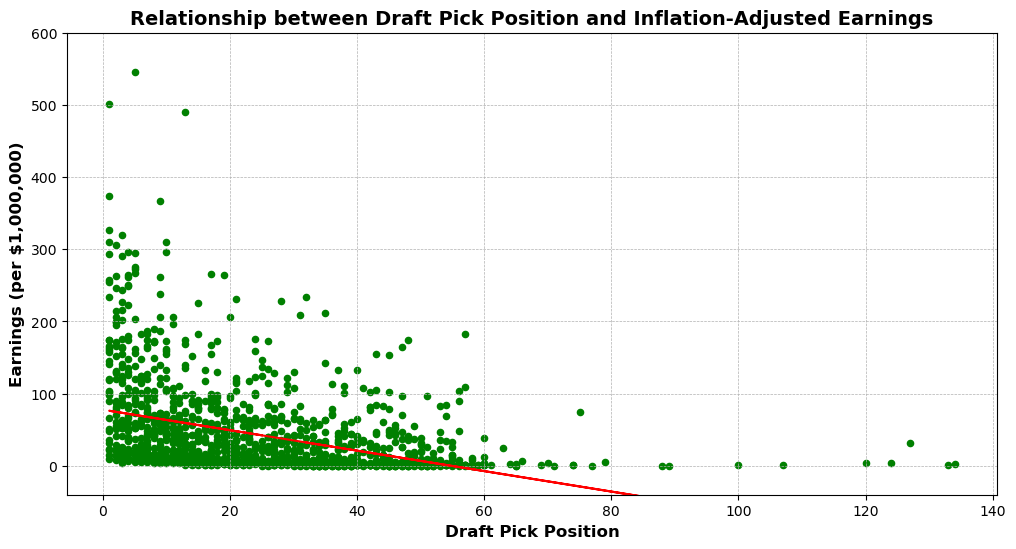

In [54]:
# Create a scatter plot to find relationship between Draft Pick Position and Inflation-Adjusted Earnings
full_data.plot.scatter('Draft Number', 'Inflation-Adjusted Earnings', color='green', figsize=(12, 6))
plt.title('Relationship between Draft Pick Position and Inflation-Adjusted Earnings', size=14, weight='bold')
plt.xlabel('Draft Pick Position', size=12, weight='bold')
plt.ylabel('Earnings (per $1,000,000)', size=12, weight='bold')

slope, intercept, rvalue, pvalue, stderr = linregress(full_data["Draft Number"], full_data["Inflation-Adjusted Earnings"])
regress_values = full_data["Draft Number"] * slope + intercept
plt.plot(full_data["Draft Number"], regress_values, color='red')
#plt.annotate(f"y={round(slope, 0)}x + {round(intercept, 0)}", xy=(70, 30000000), color='red', size=14)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.ylim(-40000000, 600000000)
print(f"The correlation between draft pick position and Inflation-Adjusted earnings is {round(rvalue, 2)}")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("Resources/draft_position_earnings2.png", bbox_inches='tight')
plt.show()

## Relationship between Draft Year and Inflation-Adjusted Earnings

The correlation between draft year and Inflation-Adjusted earnings is -0.13


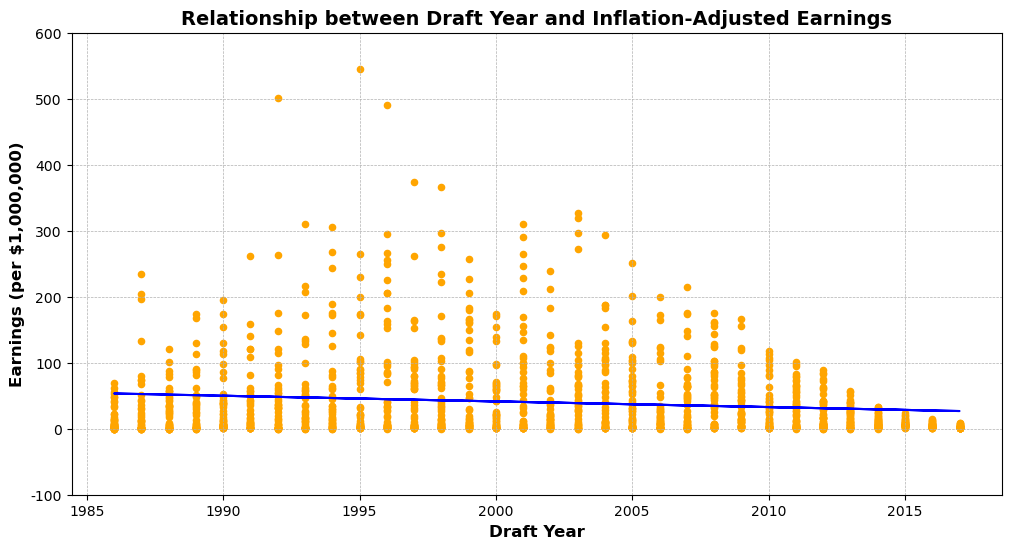

In [55]:
# Create a scatter plot to find relationship between Draft Year and Inflation-Adjusted Earnings
full_data.plot.scatter('Draft Year', 'Inflation-Adjusted Earnings', color='orange', figsize=(12, 6))
plt.title('Relationship between Draft Year and Inflation-Adjusted Earnings', size=14, weight='bold')
plt.xlabel('Draft Year', size=12, weight='bold')
plt.ylabel('Earnings (per $1,000,000)', size=12, weight='bold')

slope, intercept, rvalue, pvalue, stderr = linregress(full_data["Draft Year"], full_data["Inflation-Adjusted Earnings"])
regress_values = full_data["Draft Year"] * slope + intercept
plt.plot(full_data["Draft Year"], regress_values, color='blue')
#plt.annotate(f"y={round(slope, 0)}x + {round(intercept, 0)}", xy=(1990, -27000000), color='blue', size=14)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
print(f"The correlation between draft year and Inflation-Adjusted earnings is {round(rvalue, 2)}")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("Resources/draft_year_earnings2.png", bbox_inches='tight')
plt.show()

In [56]:
# Created a new column that displays the age at which the player was drafted in the NBA
full_data['Age Drafted'] = full_data['Draft Year'] - full_data['Year']

In [57]:
display(full_data.head())

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings,Draft Number,Age Drafted
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06,25.0,22
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07,3.0,21
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07,11.0,23
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08,3.0,20
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07,32.0,20


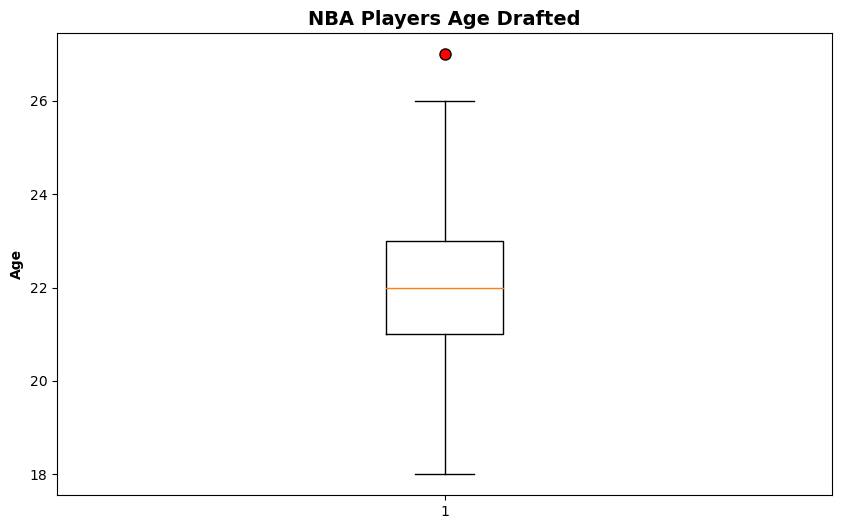

In [58]:
# Creating a box and whisker plot of the newly created "Age Drafted" column
plt.figure(figsize=(10, 6))
plt.boxplot(full_data['Age Drafted'], flierprops = dict(marker = "o", markerfacecolor = "red", markersize=8))
plt.title('NBA Players Age Drafted', size=14, weight="bold")
plt.ylabel('Age', weight="bold")
plt.savefig("Resources/age_drafted_outliers.png", bbox_inches='tight')
plt.show()


In [59]:
age_drafted_summary = full_data['Age Drafted'].describe()[['min', '25%', '50%', '75%', 'max']]
display(age_drafted_summary)

min    18.0
25%    21.0
50%    22.0
75%    23.0
max    27.0
Name: Age Drafted, dtype: float64

In [60]:
# Find the oldest player drafted
max_age = age_drafted_summary["max"]
full_data.loc[full_data['Age Drafted'] == max_age]

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings,Draft Number,Age Drafted
672,jamesbe01,Bernard James,February,7,1985,Center,Florida State University,2012,2nd round,33rd overall,92,2.2,202,Savannah,Georgia,2414585,3.213460e+06,33.0,27


# NBA University Study

In [61]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as mcolors

In [62]:
# Pull NBA draft CSV
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [63]:
# Pull NBA salary CSV
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [64]:
# Merge data
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07


In [65]:
# Print total number of rows
full_data.count()

_id                            1535
Name                           1535
Month                          1535
Day                            1535
Year                           1535
Position                       1535
College                        1535
Draft Year                     1535
Draft Round                    1535
Draft Pick                     1535
Career Games Played            1535
Career Points Per Game         1535
Total Career Points            1535
Birth City                     1535
Birth State/Country            1532
Total Earnings                 1535
Inflation-Adjusted Earnings    1535
dtype: int64

# What university produces the most NBA players?

In [66]:
# Group data by colleges and sort by highest number of rows
uni_data = full_data.groupby("College")
most_players = uni_data.size().sort_values(ascending=False)
display(most_players.head())

College
No college                               210
University of Kentucky                    44
Duke University                           42
University of California, Los Angeles     40
University of North Carolina              38
dtype: int64

In [67]:
# Find college with the highest number of players produced
i = 0
while most_players.index[i] == "No college":
    i += 1
print(f"The university that produces the highest number of NBA players is: {most_players.index[i]} with a total of {most_players.loc[most_players.index[i]]} players.")

The university that produces the highest number of NBA players is: University of Kentucky with a total of 44 players.


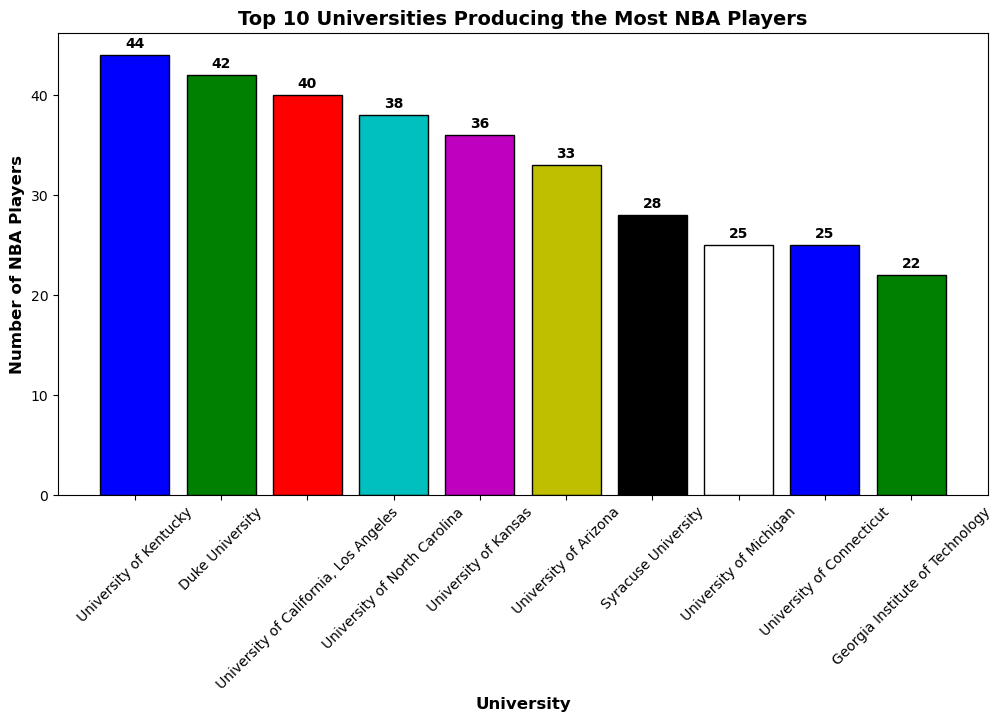

In [68]:
# 1. Universities Producing the Most NBA Players
fig, ax = plt.subplots(figsize=(12, 6))
player_data = most_players.iloc[1:11]
bar_container = ax.bar(player_data.index, player_data, color=mcolors.BASE_COLORS, edgecolor='black')
ax.bar_label(bar_container, weight='bold', padding=3)

plt.title('Top 10 Universities Producing the Most NBA Players', size=14, weight='bold')
plt.ylabel('Number of NBA Players', size=12, weight='bold')
plt.xlabel('University', size=12, weight='bold')
plt.xticks(rotation=45)
plt.savefig("Resources/university_player_numbers.png", bbox_inches='tight')
plt.show()


# Which university produces the highest average career earnings?

In [69]:
# Group data by colleges and sort by highest average career earnings
highest_earnings = uni_data["Total Earnings"].mean().sort_values(ascending=False)
#display(highest_earnings.head())

In [70]:
# Find the college with the highest average career earnings
i = 0
while highest_earnings.index[i] == "No college":
    i += 1
highest_value = "${:,.2f}".format(highest_earnings.loc[highest_earnings.index[i]])
print(f"The university that produces the highest average player earnings is: {highest_earnings.index[i]} with a total of {highest_value}")

The university that produces the highest average player earnings is: Santa Clara University with a total of $146,936,620.00


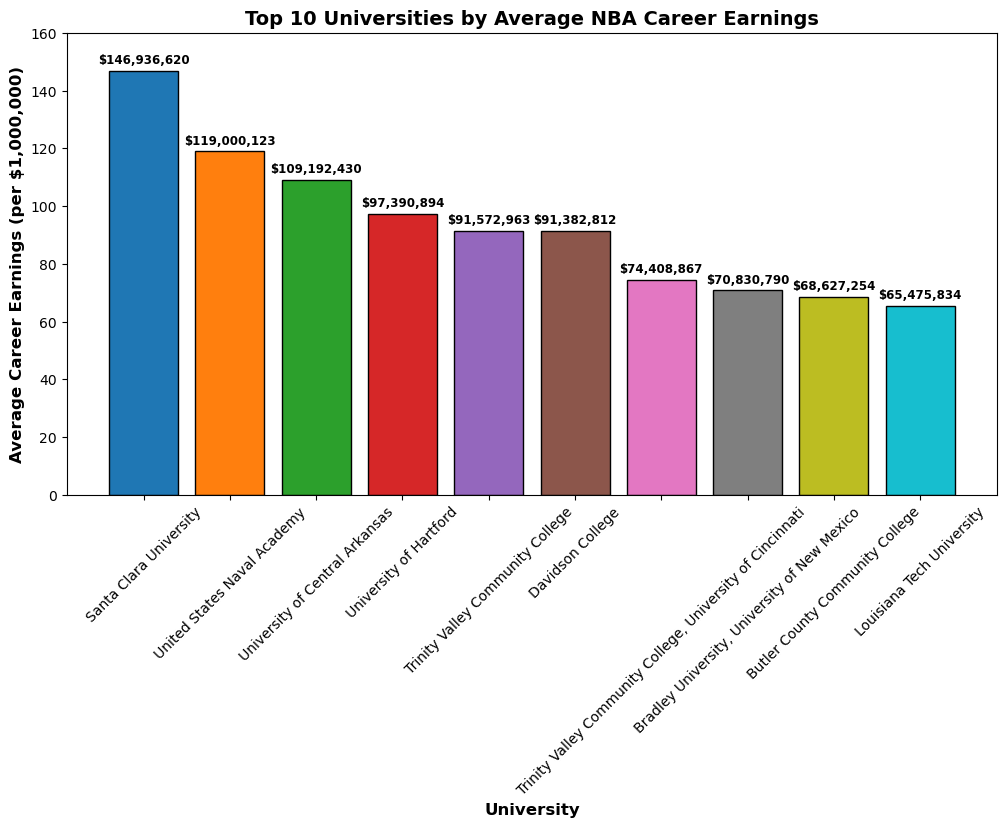

In [71]:
# 2. Average Career Earnings by University
earnings_data = highest_earnings.head(10)
fig, ax = plt.subplots(figsize=(12, 6))
bar_container = ax.bar(earnings_data.index, earnings_data, color=mcolors.TABLEAU_COLORS, edgecolor='black')
ax.bar_label(bar_container, fmt='${:,.0f}', weight='bold', padding=3, size=8.5)

plt.title('Top 10 Universities by Average NBA Career Earnings', size=14, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xlabel('University', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.xticks(rotation=45)
plt.savefig("Resources/university_earnings.png", bbox_inches='tight')
plt.show()


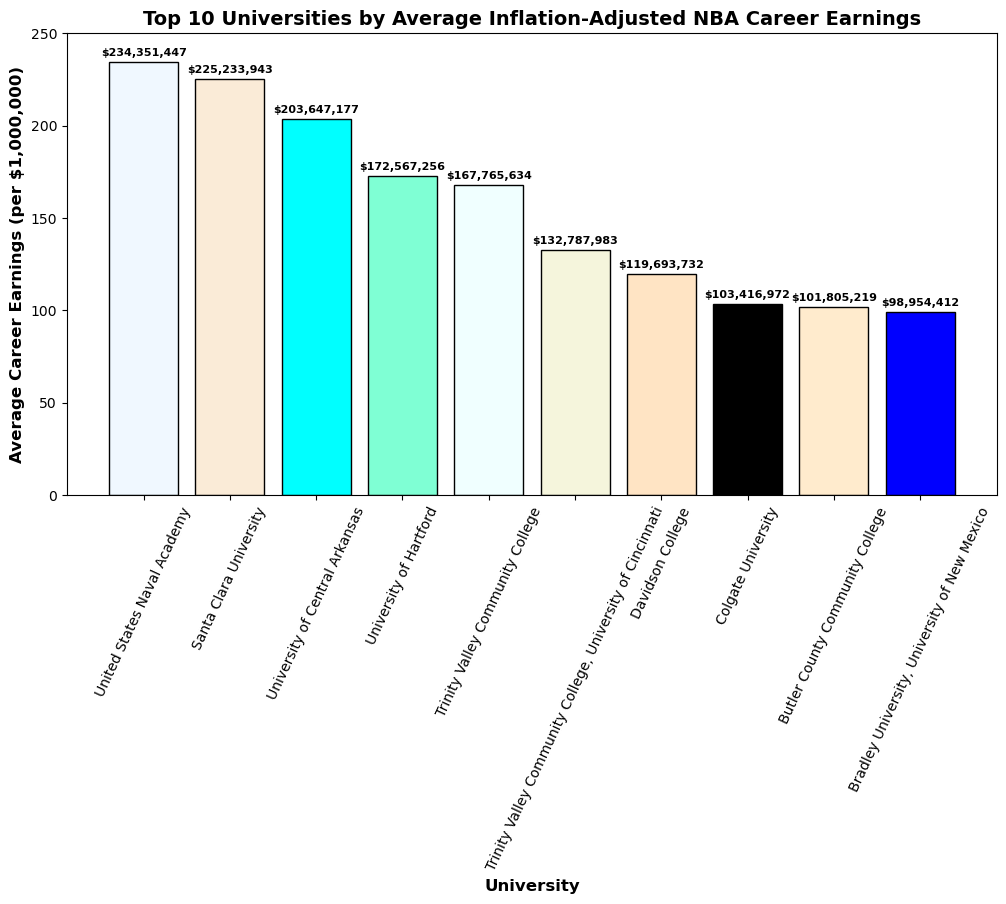

In [72]:
# 3. Average Inflation-Adjusted Career Earnings by University
highest_earnings_adjusted = uni_data["Inflation-Adjusted Earnings"].mean().sort_values(ascending=False)

earnings_data = highest_earnings_adjusted.head(10)
fig, ax = plt.subplots(figsize=(12, 6))
bar_container = ax.bar(earnings_data.index, earnings_data, color=mcolors.CSS4_COLORS, edgecolor='black')
ax.bar_label(bar_container, fmt='${:,.0f}', weight='bold', padding=3, size=8)

plt.title('Top 10 Universities by Average Inflation-Adjusted NBA Career Earnings', size=14, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xlabel('University', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.xticks(rotation=65)
plt.savefig("Resources/university_inflation_earnings.png", bbox_inches='tight')
plt.show()

# Which university produces the most #1 draft picks?

In [73]:
# Group data by colleges and sort by highest #1 draft picks
first_picks = full_data.loc[full_data["Draft Pick"] == "1st overall"][["College", "Draft Pick"]]
first_picks_uni_data = first_picks.groupby("College")
most_picks = first_picks_uni_data.count().sort_values(by="Draft Pick", ascending=False).squeeze()
#display(most_picks.head())

In [74]:
# Find the college with the highest number of #1 draft picks
i = 0
while most_picks.index[i] == "No college":
    i += 1
print(f"The university that produces the highest number of #1 draft picks is: {most_picks.index[i]} with a total of {most_picks.loc[most_picks.index[i]]} players.")

The university that produces the highest number of #1 draft picks is: University of Kentucky with a total of 3 players.


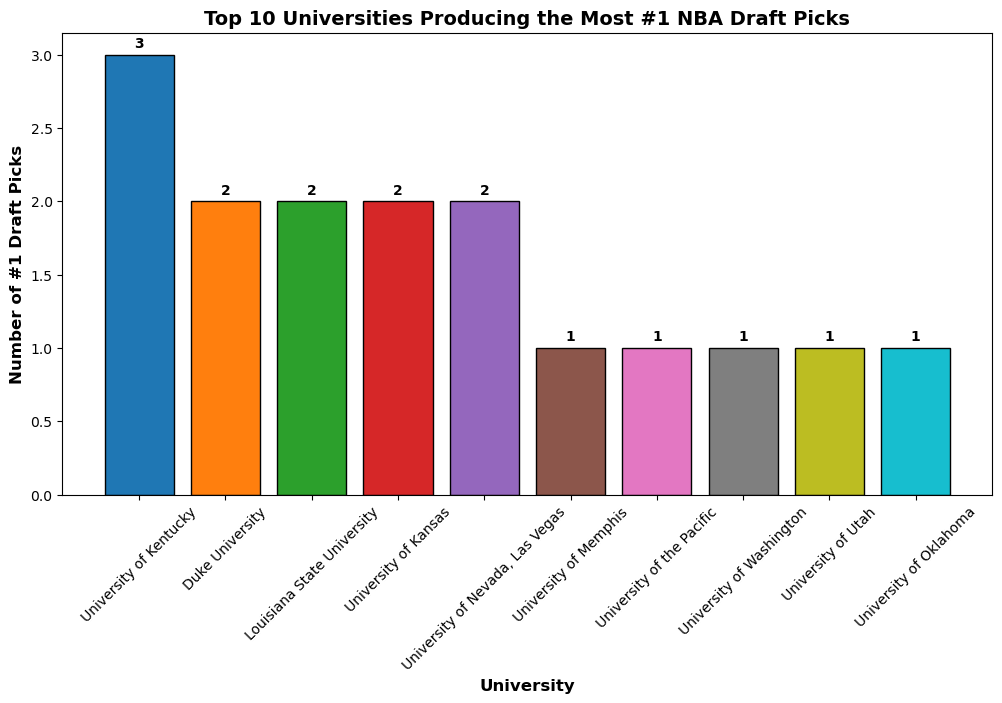

In [75]:
# 4. Universities Producing the Most #1 Draft Picks
fig, ax = plt.subplots(figsize=(12, 6))
picks_data = most_picks.iloc[1:11]
bar_container = ax.bar(picks_data.index, picks_data, color=mcolors.TABLEAU_COLORS, edgecolor='black')
ax.bar_label(bar_container, weight='bold', padding=3)
             
plt.title('Top 10 Universities Producing the Most #1 NBA Draft Picks', size=14, weight='bold')
plt.ylabel('Number of #1 Draft Picks', size=12, weight='bold')
plt.xlabel('University', size=12, weight='bold')
plt.xticks(rotation=45)
plt.savefig("Resources/university_draft_picks.png", bbox_inches='tight')
plt.show()

## Charts including players with "No college"

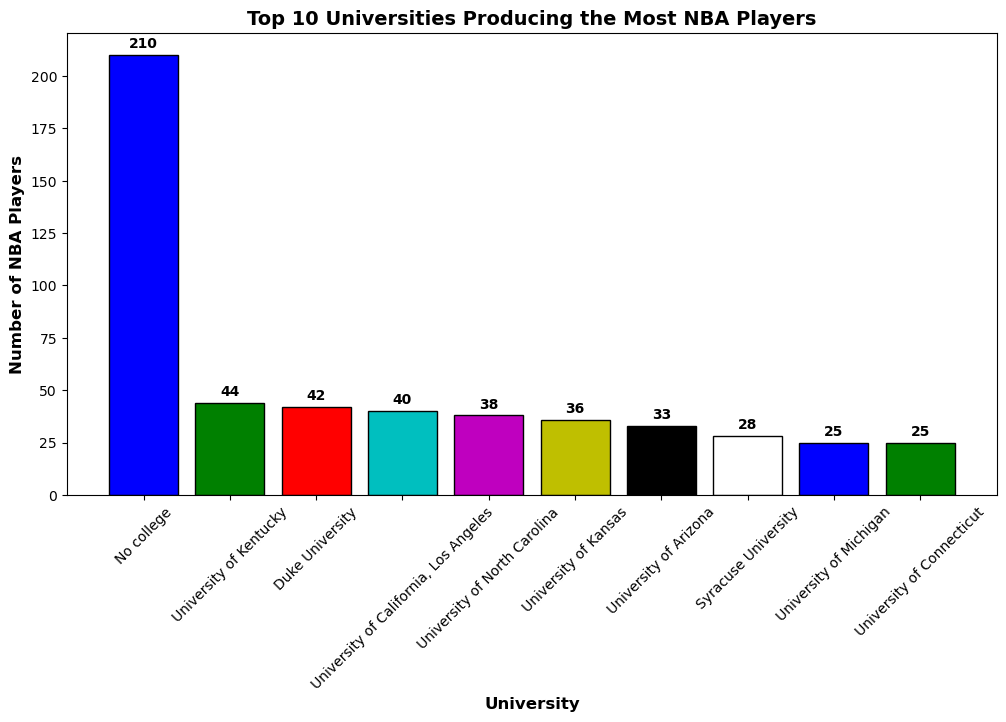

In [76]:
# 1. Universities Producing the Most NBA Players
fig, ax = plt.subplots(figsize=(12, 6))
player_data = most_players.head(10)
bar_container = ax.bar(player_data.index, player_data, color=mcolors.BASE_COLORS, edgecolor='black')
ax.bar_label(bar_container, weight='bold', padding=3)

plt.title('Top 10 Universities Producing the Most NBA Players', size=14, weight='bold')
plt.ylabel('Number of NBA Players', size=12, weight='bold')
plt.xlabel('University', size=12, weight='bold')
plt.xticks(rotation=45)
plt.savefig("Resources/university_player_numbers2.png", bbox_inches='tight')
plt.show()

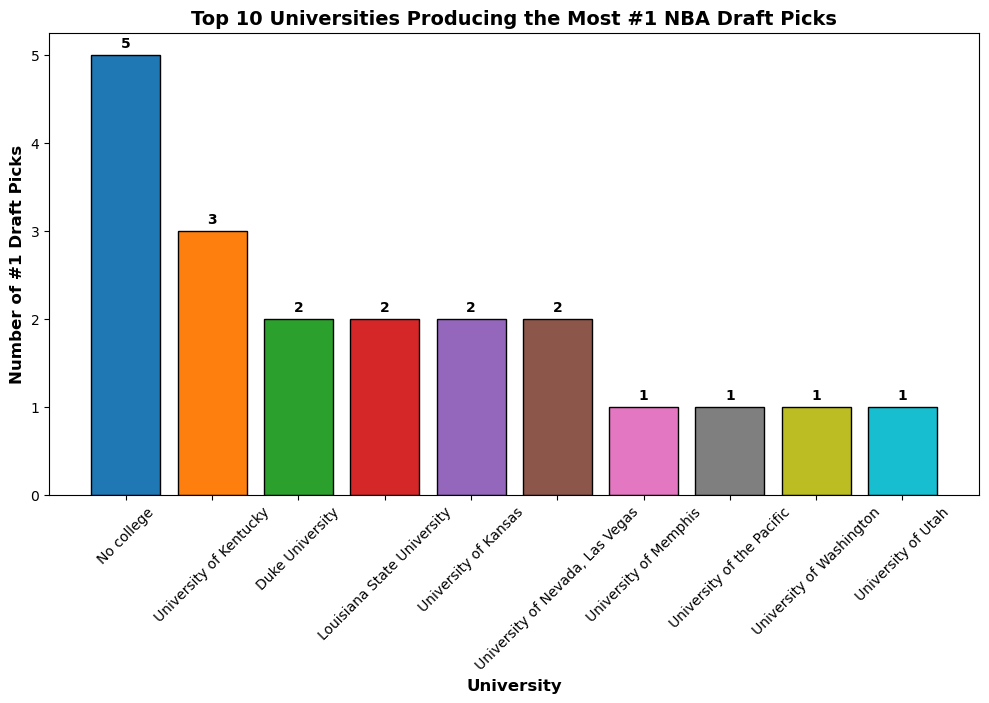

In [77]:
# 4. Universities Producing the Most #1 Draft Picks
fig, ax = plt.subplots(figsize=(12, 6))
picks_data = most_picks.head(10)
bar_container = ax.bar(picks_data.index, picks_data, color=mcolors.TABLEAU_COLORS, edgecolor='black')
ax.bar_label(bar_container, weight='bold', padding=3)

plt.title('Top 10 Universities Producing the Most #1 NBA Draft Picks', size=14, weight='bold')
plt.ylabel('Number of #1 Draft Picks', size=12, weight='bold')
plt.xlabel('University', size=12, weight='bold')
plt.xticks(rotation=45)
plt.savefig("Resources/university_draft_picks2.png", bbox_inches='tight')
plt.show()

In [78]:
import seaborn as sns

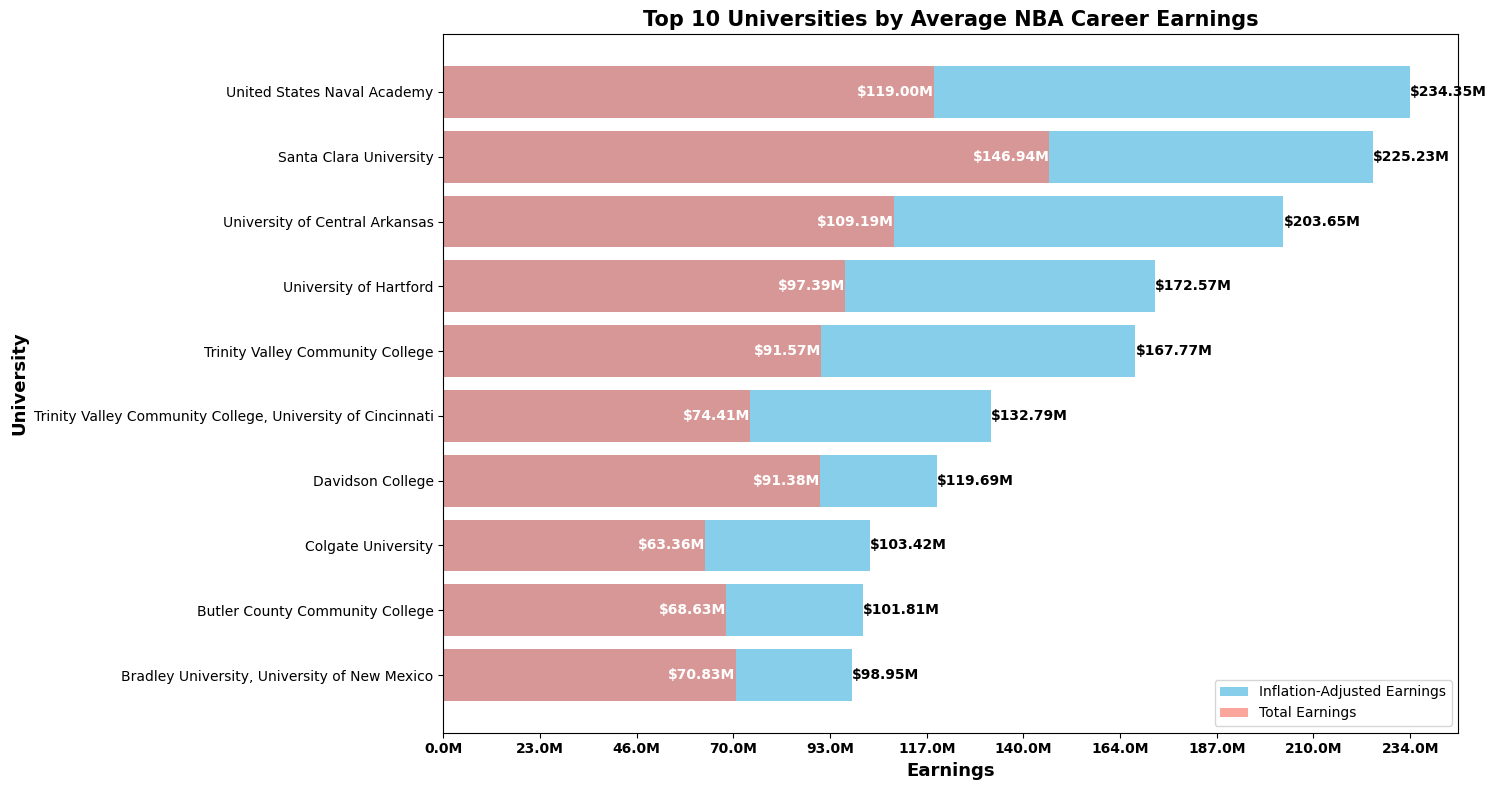

In [79]:
# 5. Top 10 colleges producing the highest inflation-adjusted earnings
college_earnings_adjusted = uni_data["Inflation-Adjusted Earnings"].mean().sort_values(ascending=False).head(10)
college_earnings = uni_data["Total Earnings"].mean().loc[college_earnings_adjusted.index]

plt.figure(figsize=(15, 8))

bars_adjusted = plt.barh(college_earnings_adjusted.index,college_earnings_adjusted.values, color='skyblue', label='Inflation-Adjusted Earnings')
bars = plt.barh(college_earnings.index, college_earnings.values, color='salmon', alpha=0.7, label='Total Earnings')

for bars_adjusted, bars in zip(bars_adjusted, bars):
    plt.text(bars_adjusted.get_width(), bars_adjusted.get_y() + bars_adjusted.get_height()/2, 
             f"${bars_adjusted.get_width()/1e6:.2f}M", va='center', ha='left', fontsize=10, weight="bold")
    plt.text(bars.get_width(), bars.get_y() + bars.get_height()/2, 
             f"${bars.get_width()/1e6:.2f}M", va='center', ha='right', fontsize=10, color='white', weight="bold")

max_earnings = max(college_earnings_adjusted.max(), college_earnings.max())
xticks = [i for i in range(0, int(max_earnings) + 1, int(max_earnings/10))]
plt.xticks(xticks, [f"{i//1e6}M" for i in xticks], weight="bold")

plt.title('Top 10 Universities by Average NBA Career Earnings', size=15, weight="bold")
plt.xlabel('Earnings', size=13, weight="bold")
plt.ylabel('University', size=13, weight="bold")
plt.legend(loc='lower right')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Resources/university_inflation_earnings2.png", bbox_inches='tight')
plt.show()


# NBA Birthplace Study

In [80]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [82]:
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [83]:
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07


## AVERAGE EARNINGS BY BIRTH COUNTRY AND BIRTH CITY

In [84]:
countries = full_data.groupby("Birth State/Country")
top_countries = countries["Total Earnings"].mean().sort_values(ascending=False)[:10]
display(top_countries.head())

Birth State/Country
 U.S. VirgIslands         2.434717e+08
 South Africa             1.469366e+08
 South Dakota             9.317691e+07
 Republic of the Congo    7.512739e+07
 Argentina                7.230628e+07
Name: Total Earnings, dtype: float64

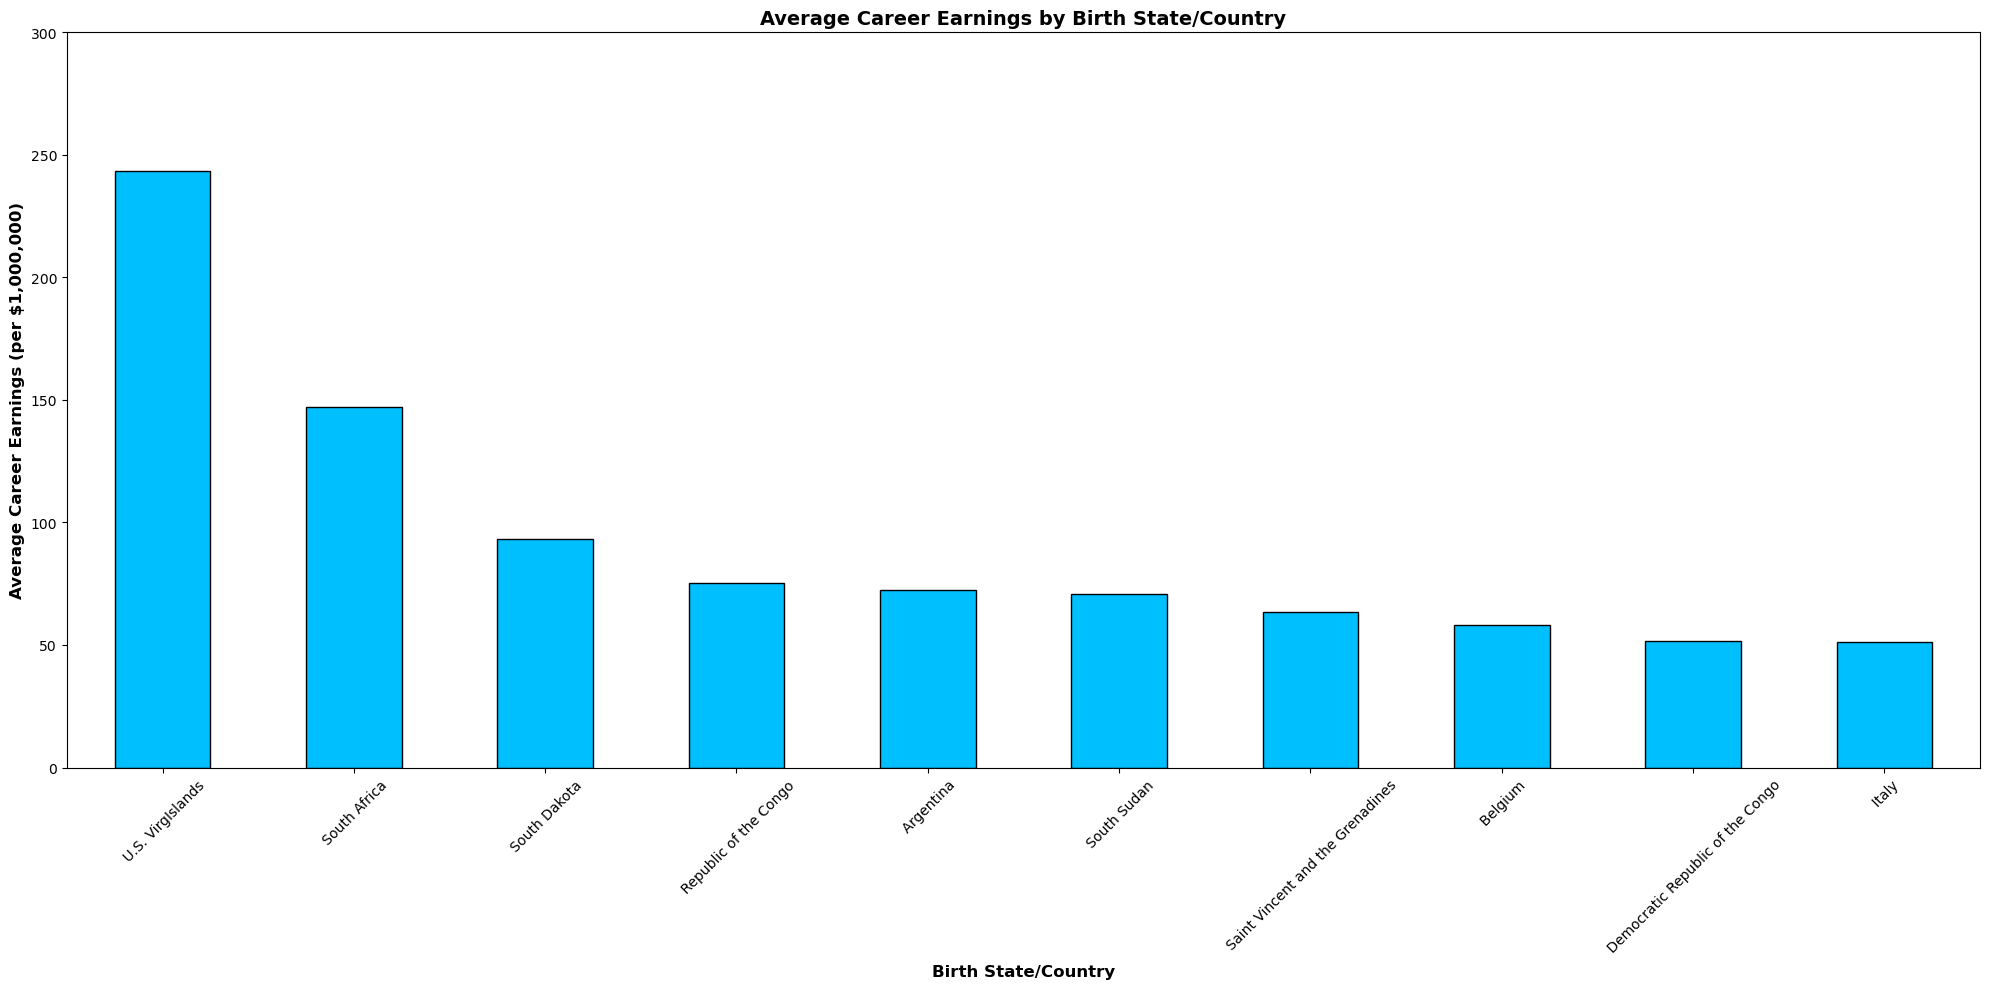

In [85]:
plt.figure(figsize=(20, 10))
top_countries.plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.title('Average Career Earnings by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth State/Country', size=12, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xticks(rotation=45)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)

plt.tight_layout()
plt.savefig("Resources/birthcountry_earnings.png", bbox_inches='tight')
plt.show()

In [86]:
countries = full_data.groupby("Birth State/Country")
top_countries = countries["Total Earnings"].mean().sort_values(ascending=False)
display(top_countries.head())

Birth State/Country
 U.S. VirgIslands         2.434717e+08
 South Africa             1.469366e+08
 South Dakota             9.317691e+07
 Republic of the Congo    7.512739e+07
 Argentina                7.230628e+07
Name: Total Earnings, dtype: float64

In [87]:
cities = full_data.groupby("Birth City")
top_cities = cities["Total Earnings"].mean().sort_values(ascending=False)[:10]
display(top_cities.head())

Birth City
Mauldin      343872398.0
Wurzburg     250371801.0
St. Croix    243471655.0
Merced       184356410.0
Hanford      173496273.0
Name: Total Earnings, dtype: float64

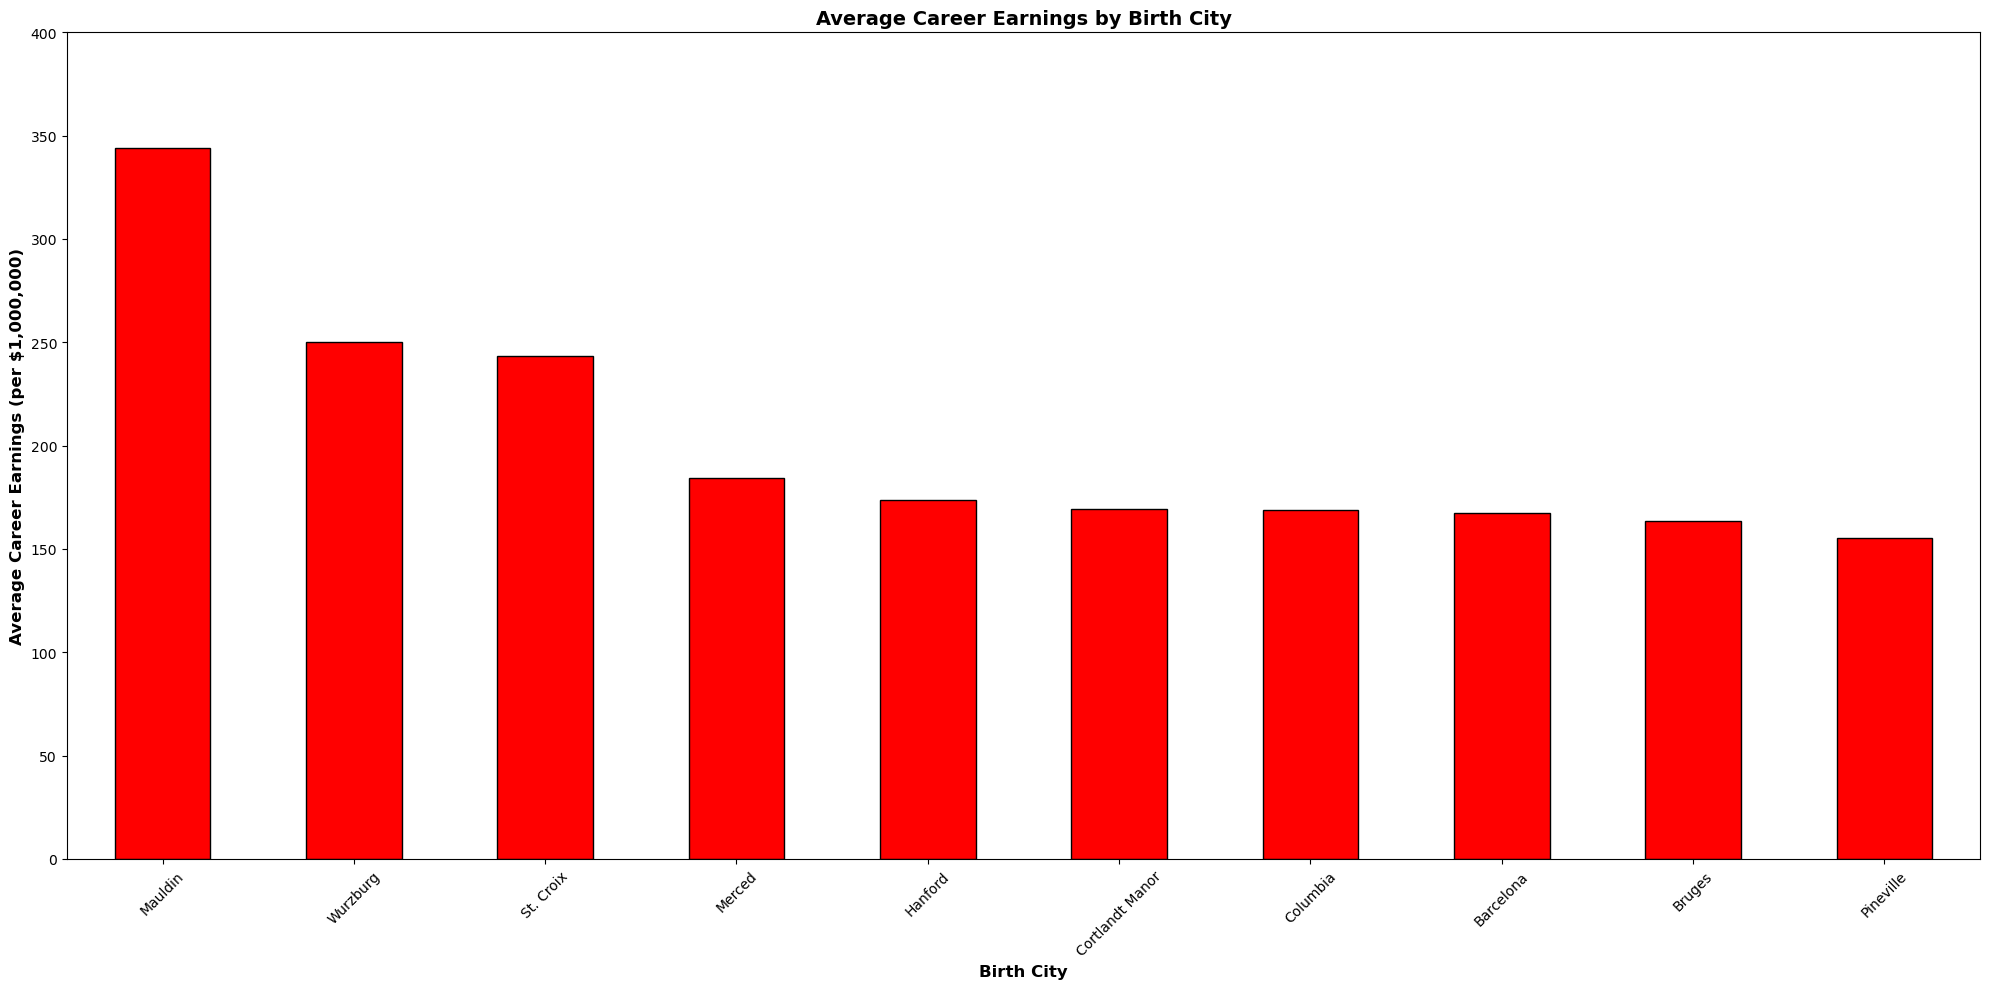

In [88]:
plt.figure(figsize=(20, 10))
top_cities.plot(kind='bar', color='red', edgecolor='black')
plt.title('Average Career Earnings by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xticks(rotation=45)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)

plt.tight_layout()
plt.savefig("Resources/birthcity_earnings.png", bbox_inches='tight')
plt.show()

## TOTAL EARNINGS BY BIRTH COUNTRY AND BIRTH CITY

In [89]:
countries_total = full_data.groupby("Birth State/Country")
top_countries_total = countries_total ["Total Earnings"].sum().sort_values(ascending=False)[:10]
display(top_countries_total.head())

Birth State/Country
 California      4508537901
 New York        2434134743
 Illinois        2306184625
 Texas           1729460874
 Pennsylvania    1678558835
Name: Total Earnings, dtype: int64

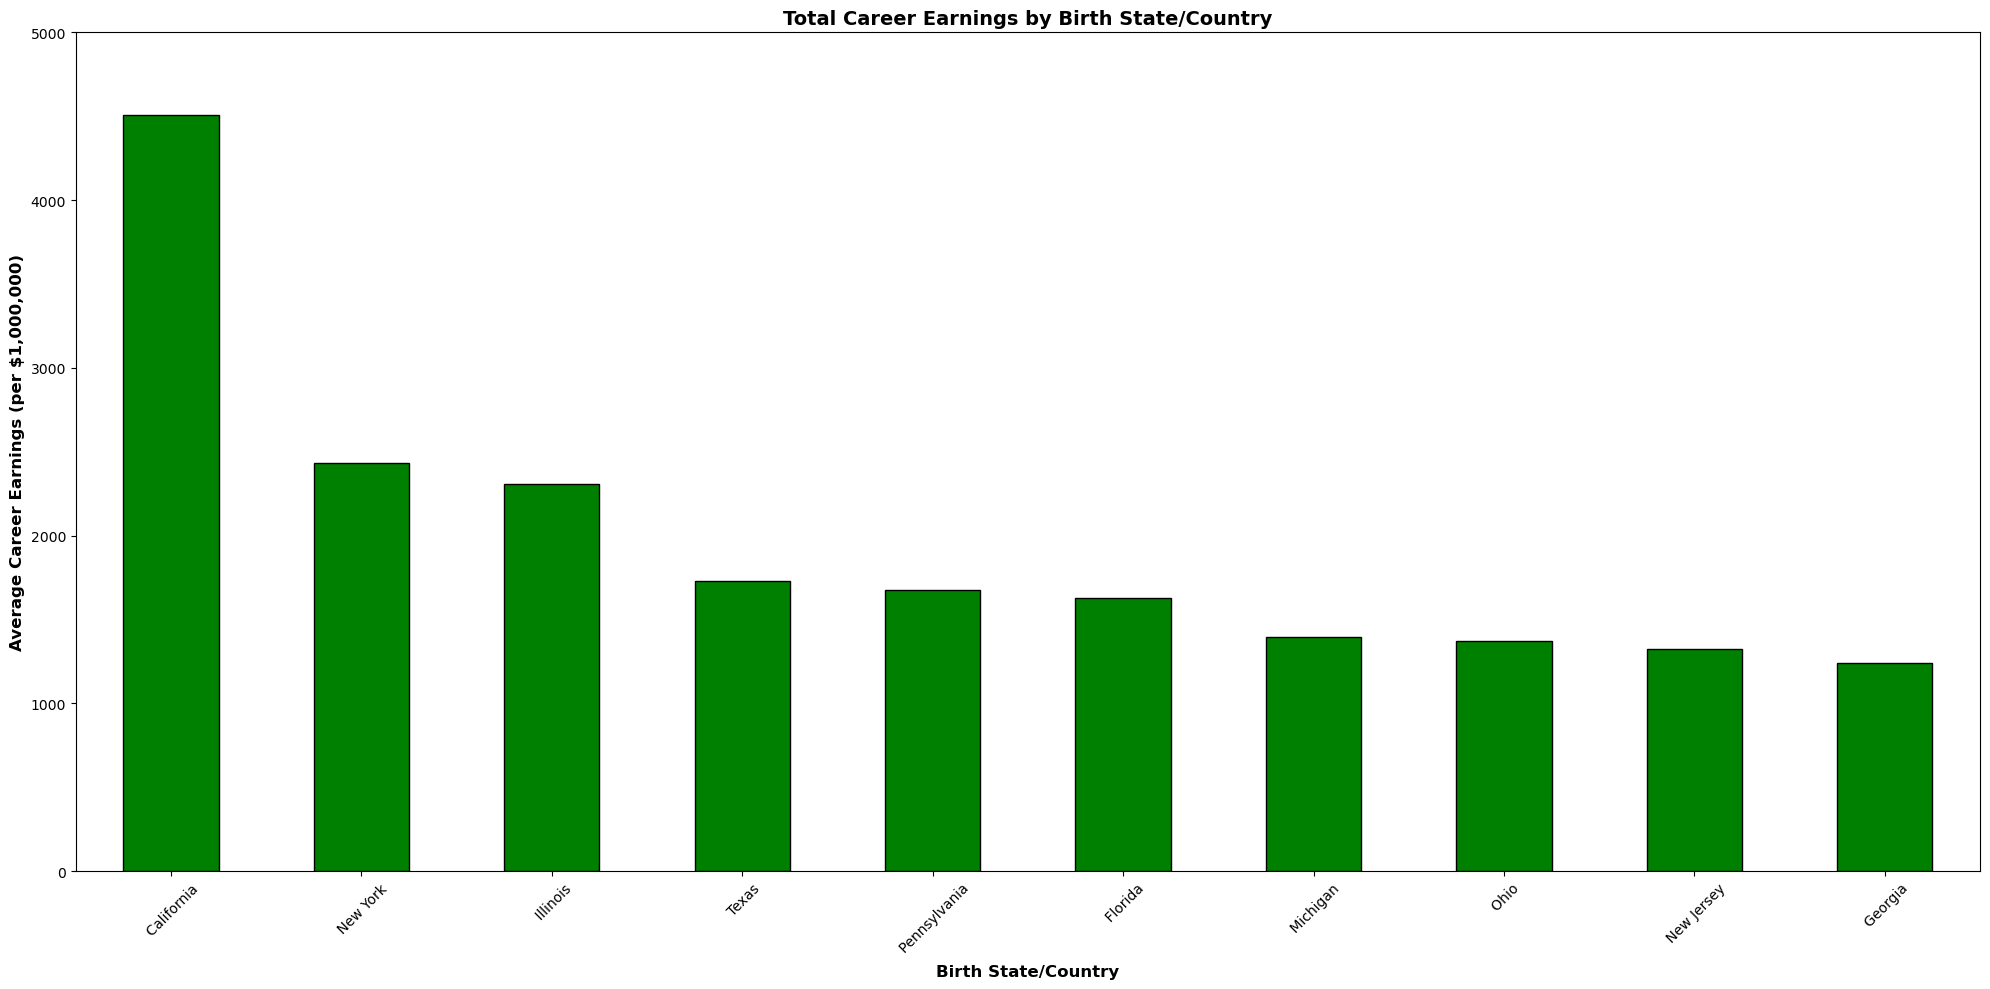

In [90]:
plt.figure(figsize=(20, 10))
top_countries_total.plot(kind='bar', color='green', edgecolor='black')
plt.title('Total Career Earnings by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth State/Country', size=12, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xticks(rotation=45)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 1000) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)

plt.tight_layout()
plt.savefig("Resources/birthcountry_earnings_total.png", bbox_inches='tight')
plt.show()

In [91]:
cities_total = full_data.groupby("Birth City")
top_cities_total =cities_total ["Total Earnings"].sum().sort_values(ascending=False)[:10]
display(top_cities_total.head())

Birth City
Chicago         1278814791
Philadelphia    1187554954
Los Angeles     1177600910
Dallas           800154191
Oakland          615842609
Name: Total Earnings, dtype: int64

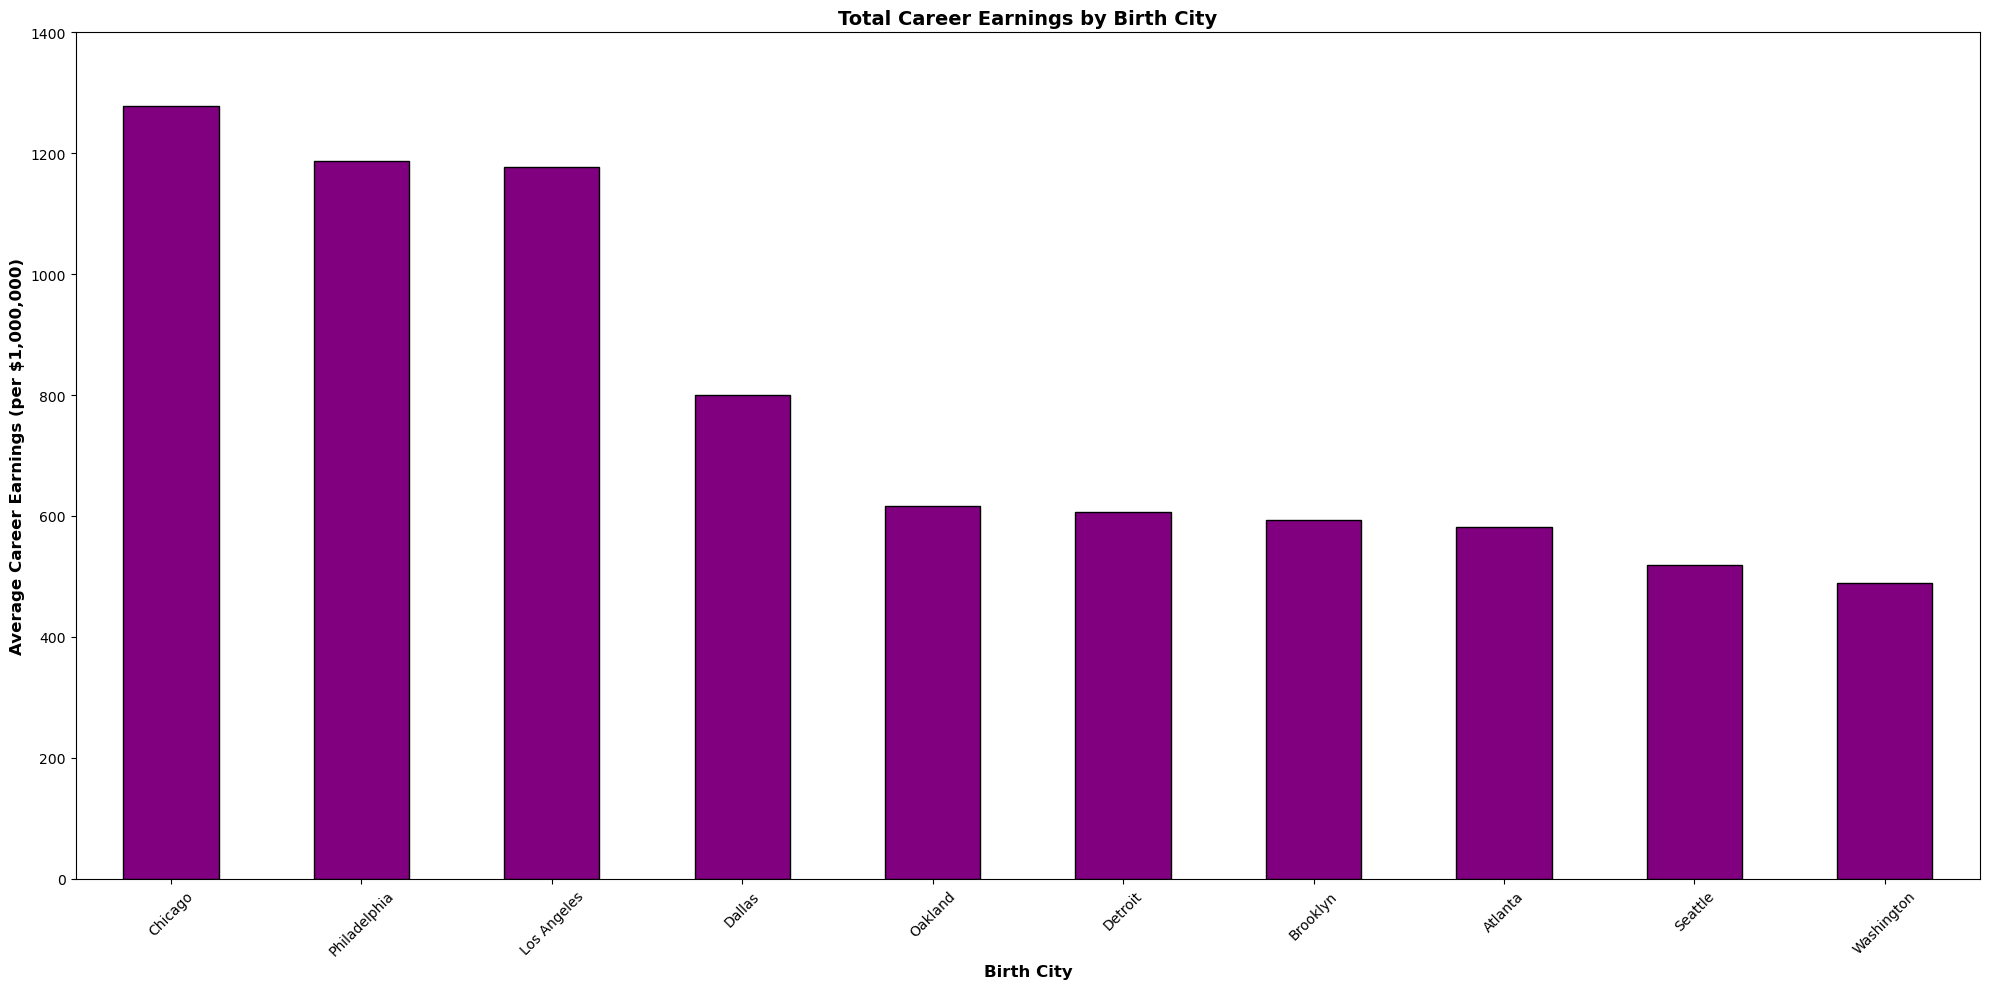

In [92]:
plt.figure(figsize=(20, 10))
top_cities_total.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Total Career Earnings by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xticks(rotation=45)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 1000) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)

plt.tight_layout()
plt.savefig("Resources/birthcity_earnings_total.png", bbox_inches='tight')
plt.show()

## MOST NBA PLAYERS BY BIRTH COUNTRY AND CITY 

In [93]:
players = full_data.groupby("Birth State/Country")
total_players = players["_id"].count().sort_values(ascending=False)[:10]
display(total_players.head())

Birth State/Country
 California    170
 New York       98
 Illinois       78
 Texas          60
 Georgia        57
Name: _id, dtype: int64

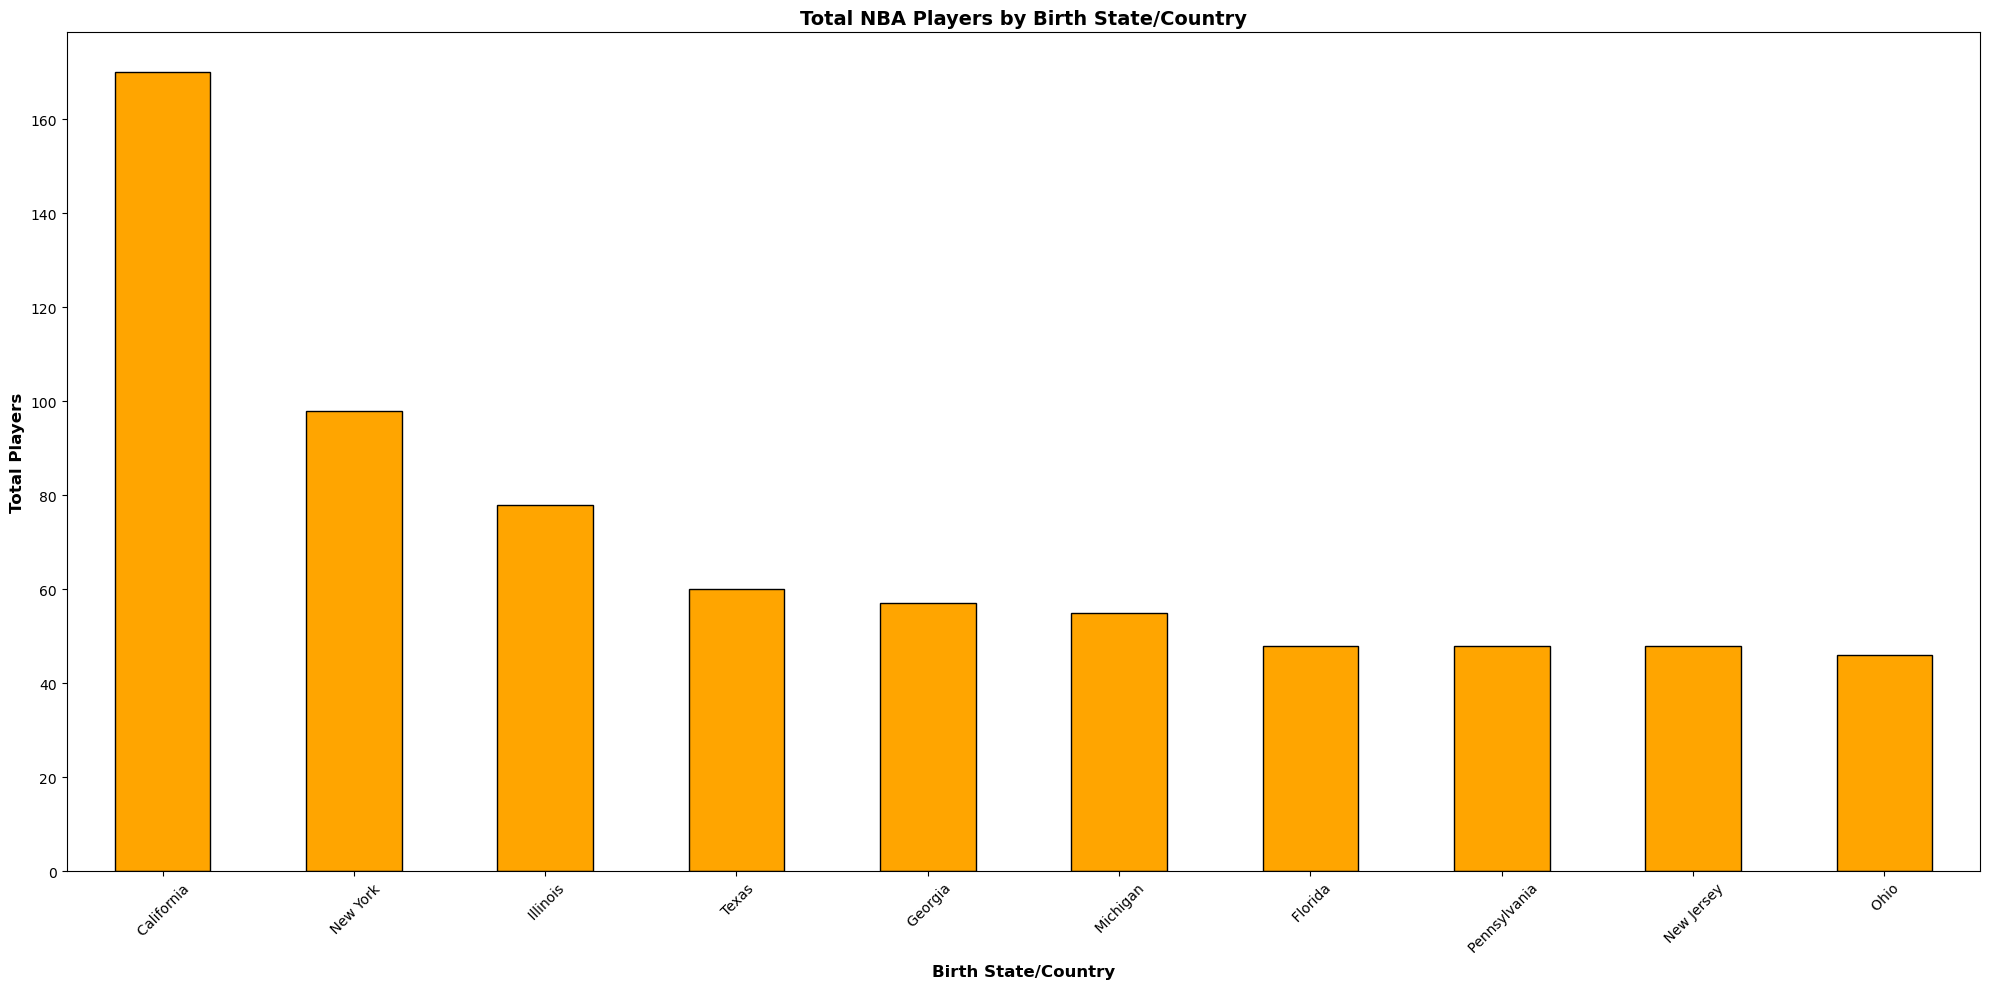

In [94]:
plt.figure(figsize=(20, 10))
total_players.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total NBA Players by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth State/Country', size=12, weight='bold')
plt.ylabel('Total Players', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Resources/birthcountry_player_numbers.png", bbox_inches='tight')
plt.show()

In [95]:
players = full_data.groupby("Birth City")
total_players = players["_id"].count().sort_values(ascending=False)[:10]
display(total_players.head())

Birth City
Los Angeles     49
Chicago         37
Philadelphia    30
Washington      26
Detroit         26
Name: _id, dtype: int64

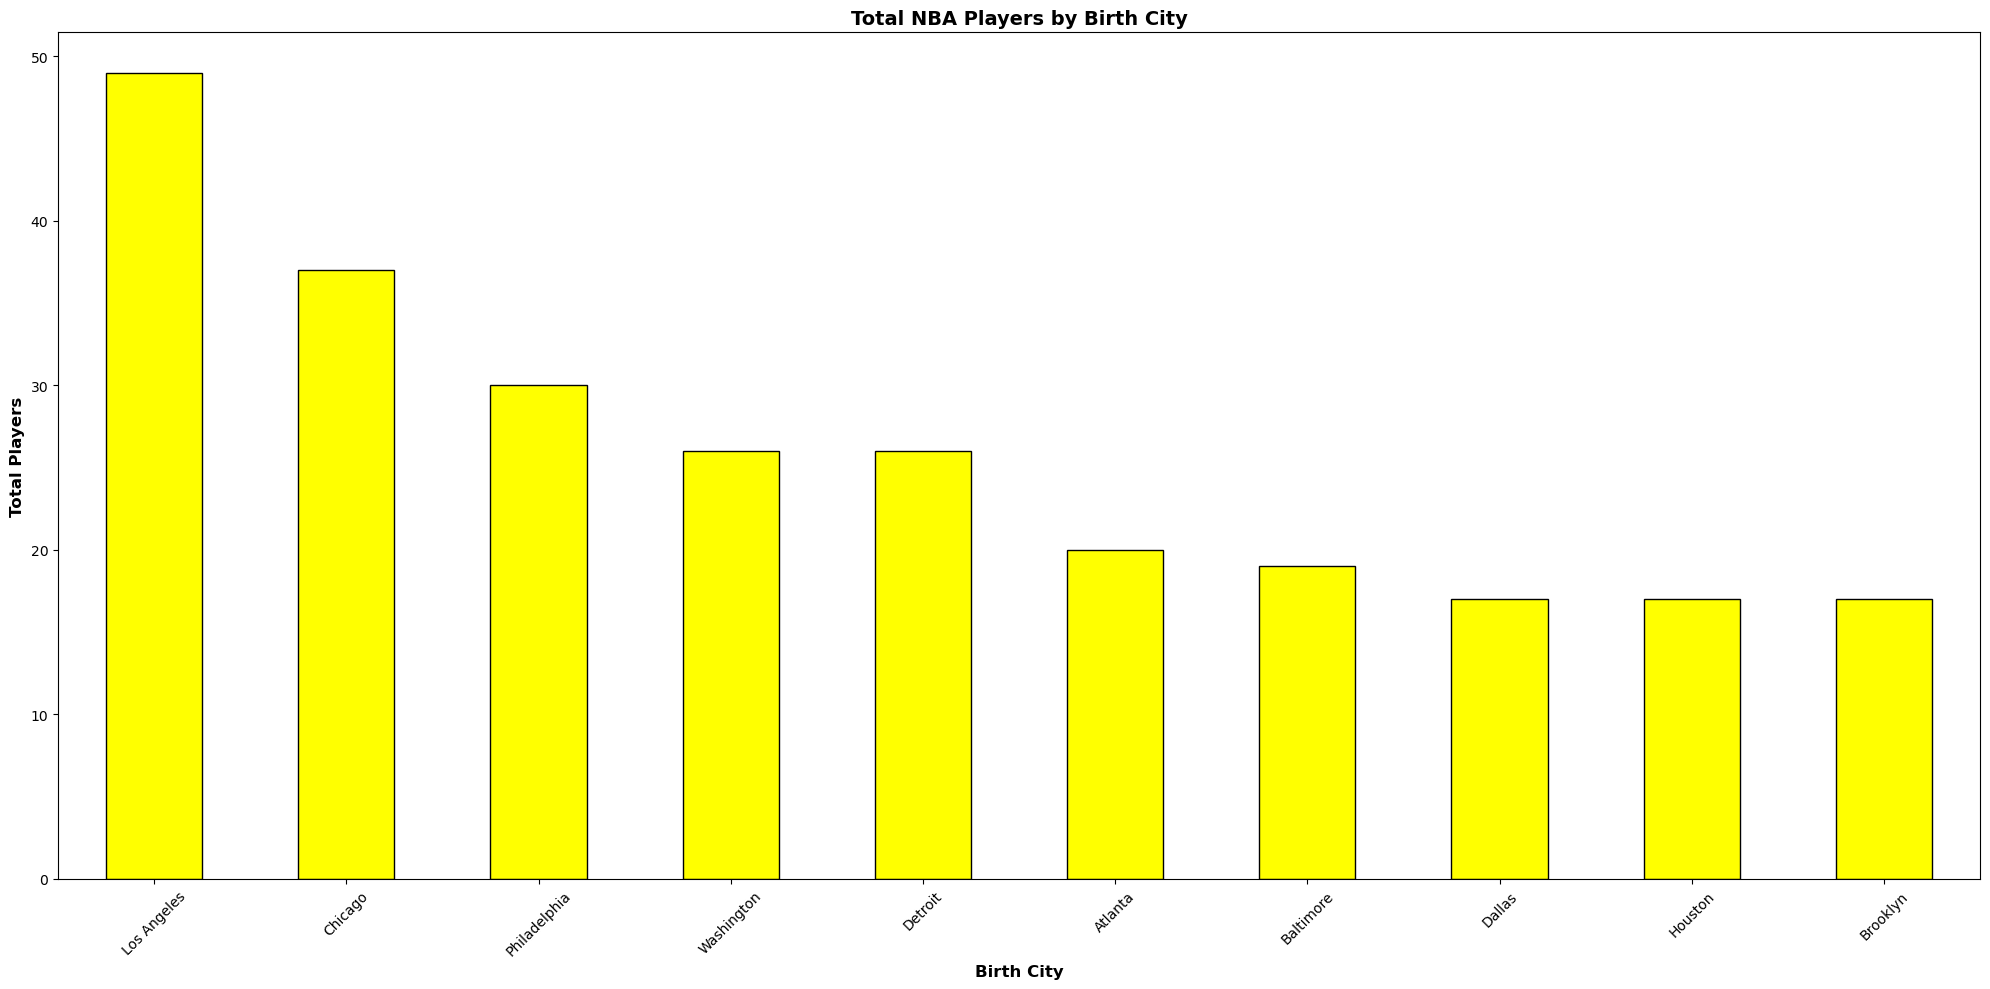

In [96]:
plt.figure(figsize=(20, 10))
total_players.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Total NBA Players by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Total Players', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## BIRTH COUNTRY AND CITY THAT PRODUCE THE BEST NBA PLAYERS

In [97]:
points_by_country = full_data.groupby("Birth State/Country")
total_points_by_country = points_by_country["Total Career Points"].sum().sort_values(ascending=False)[:10]
display(total_points_by_country.head())

Birth State/Country
 California      684660
 New York        375047
 Illinois        355588
 Pennsylvania    256367
 Florida         247283
Name: Total Career Points, dtype: int64

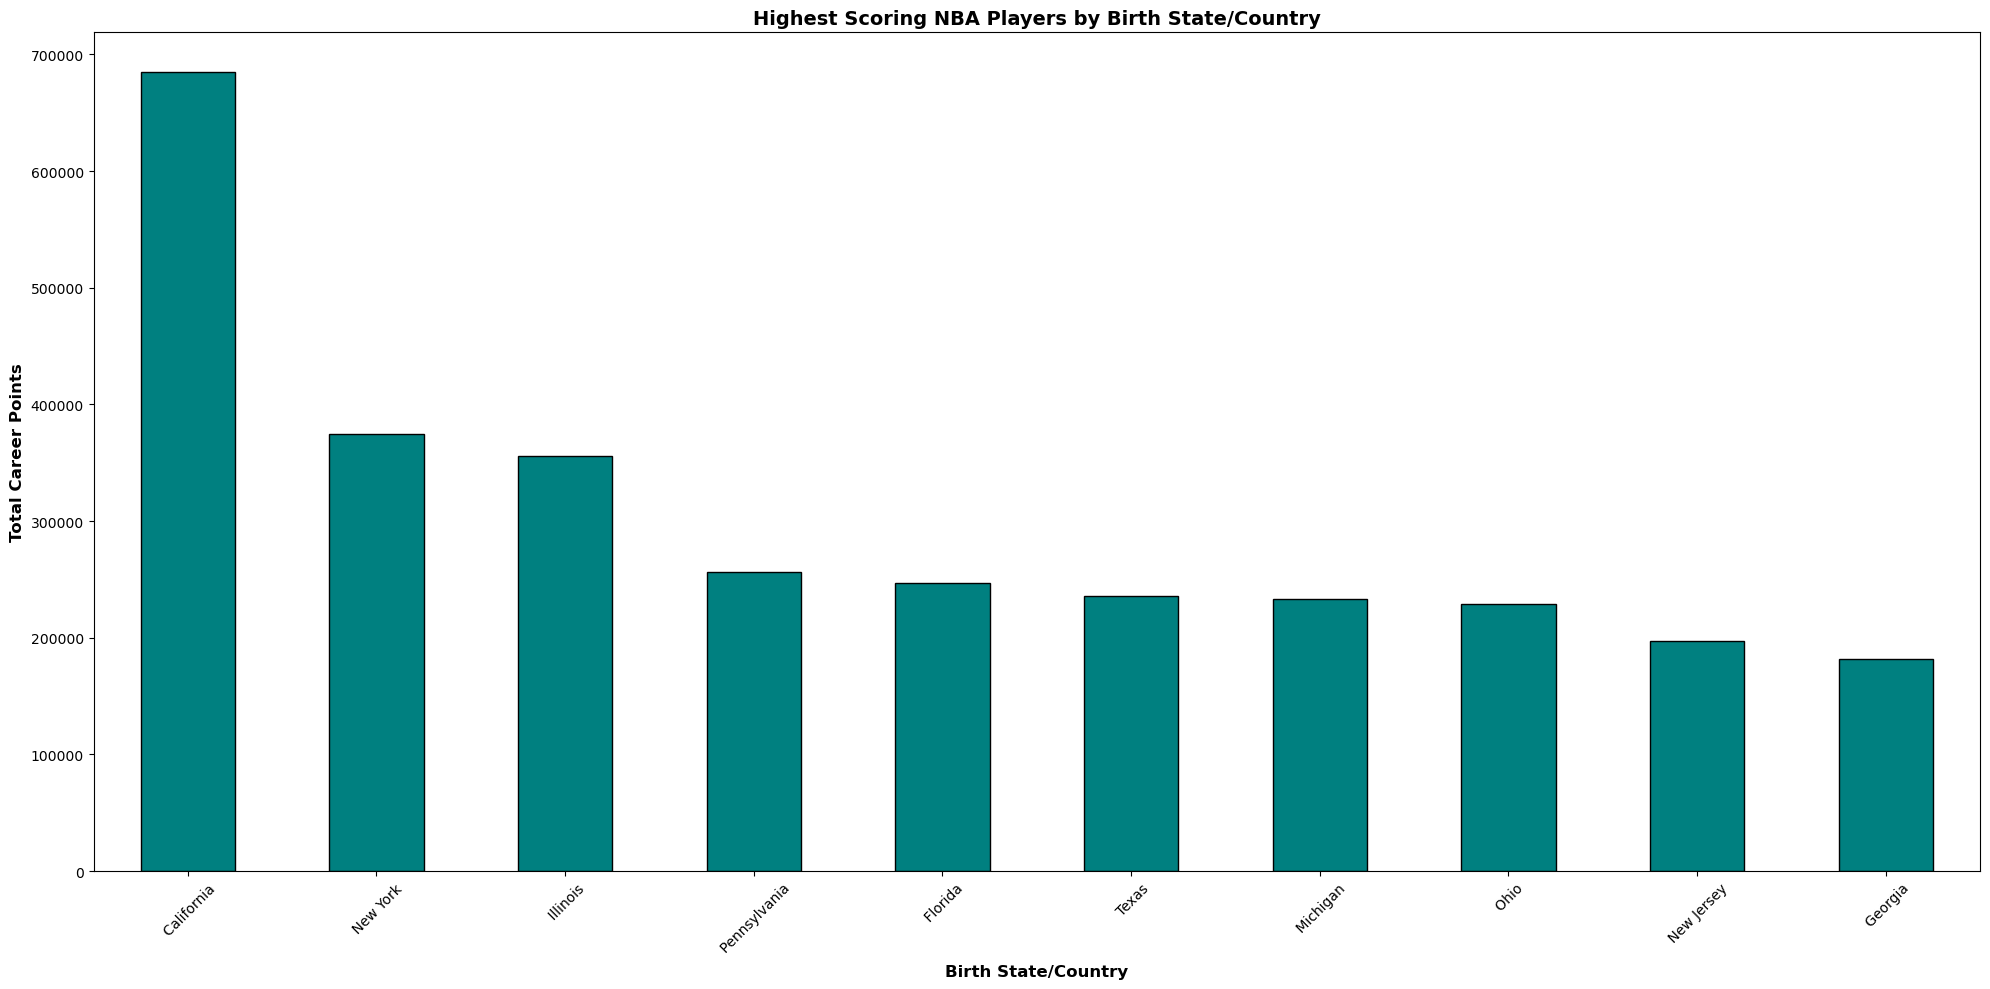

In [98]:
plt.figure(figsize=(20, 10))
total_points_by_country.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Highest Scoring NBA Players by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth State/Country', size=12, weight='bold')
plt.ylabel('Total Career Points', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
points_by_city = full_data.groupby("Birth City")
total_points_by_city = points_by_city["Total Career Points"].sum().sort_values(ascending=False)[:10]
display(total_points_by_city.head())

Birth City
Chicago         198936
Los Angeles     180247
Philadelphia    163933
Oakland         104393
Detroit          98336
Name: Total Career Points, dtype: int64

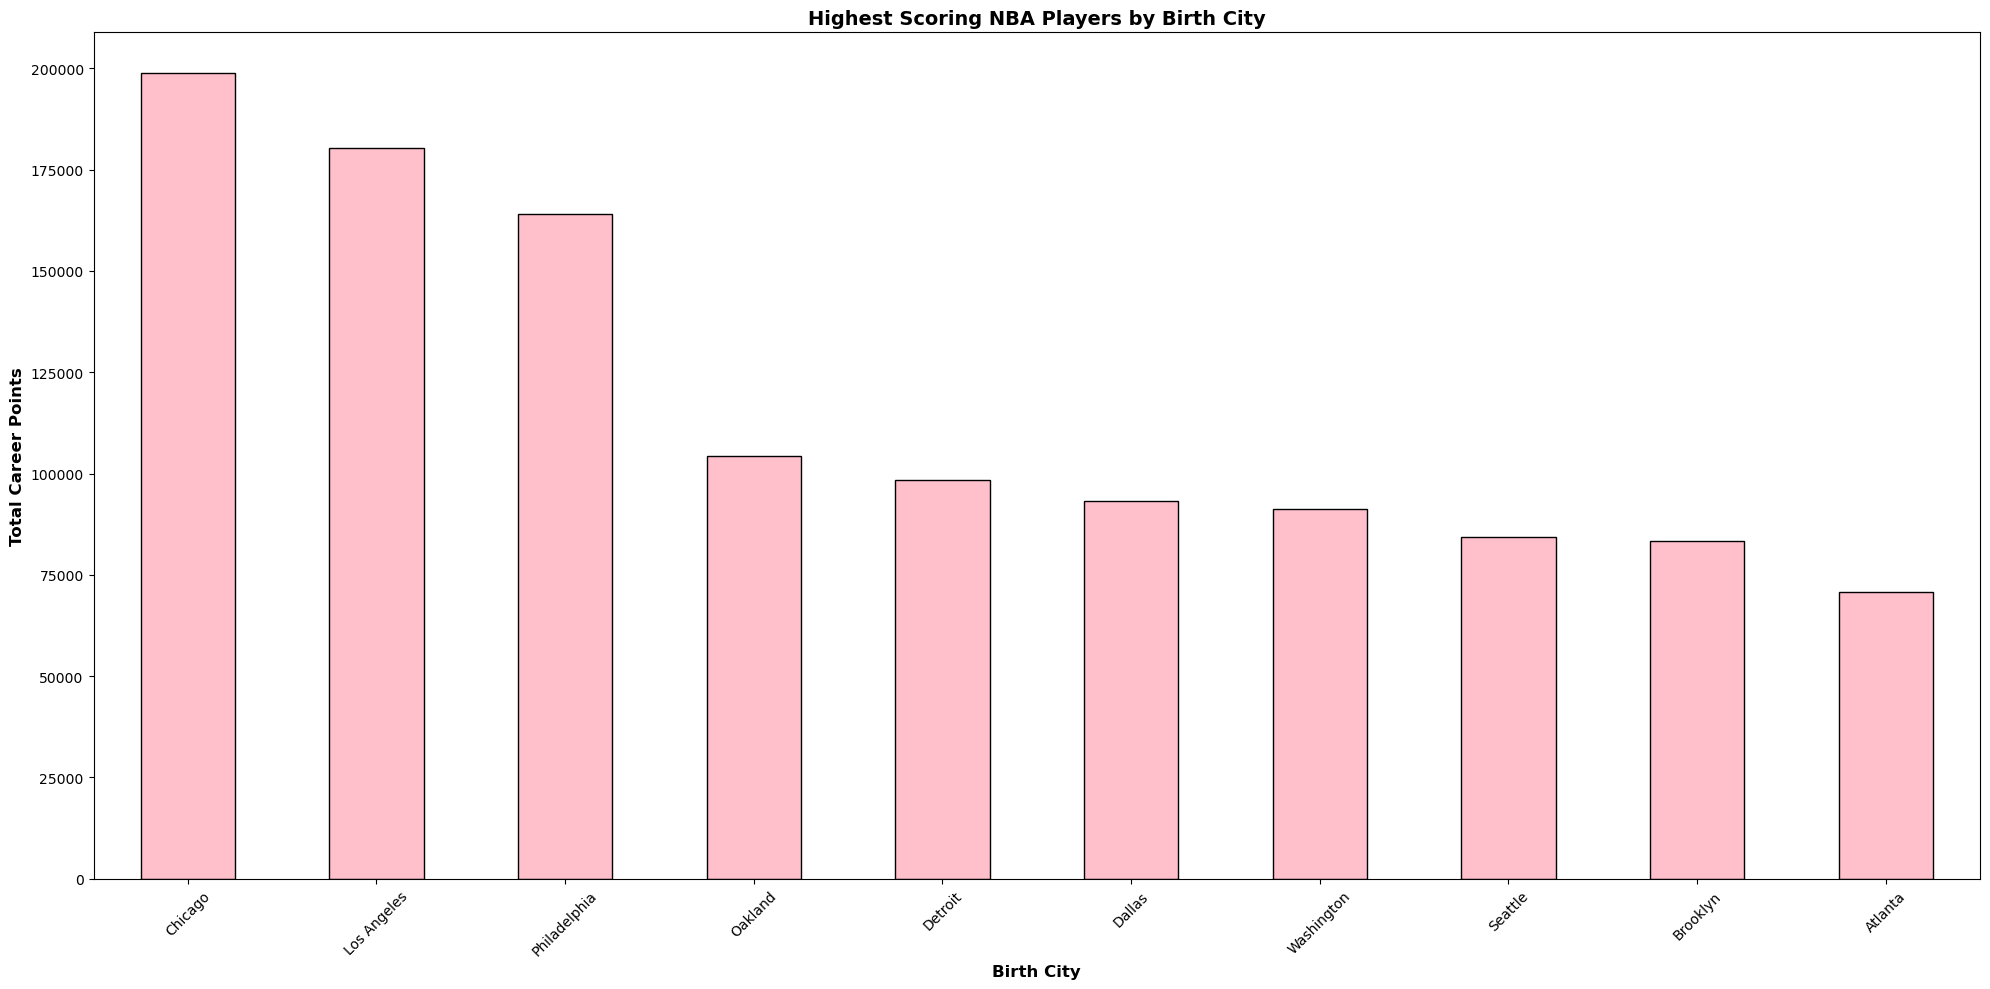

In [100]:
plt.figure(figsize=(20, 10))
total_points_by_city.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Highest Scoring NBA Players by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Total Career Points', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
games_by_country = full_data.groupby("Birth State/Country")
total_games_by_country = games_by_country["Career Games Played"].sum().sort_values(ascending=False)[:10]
display(total_games_by_country.head())

Birth State/Country
 California      67915
 New York        35680
 Illinois        32072
 Texas           23662
 Pennsylvania    22919
Name: Career Games Played, dtype: int64

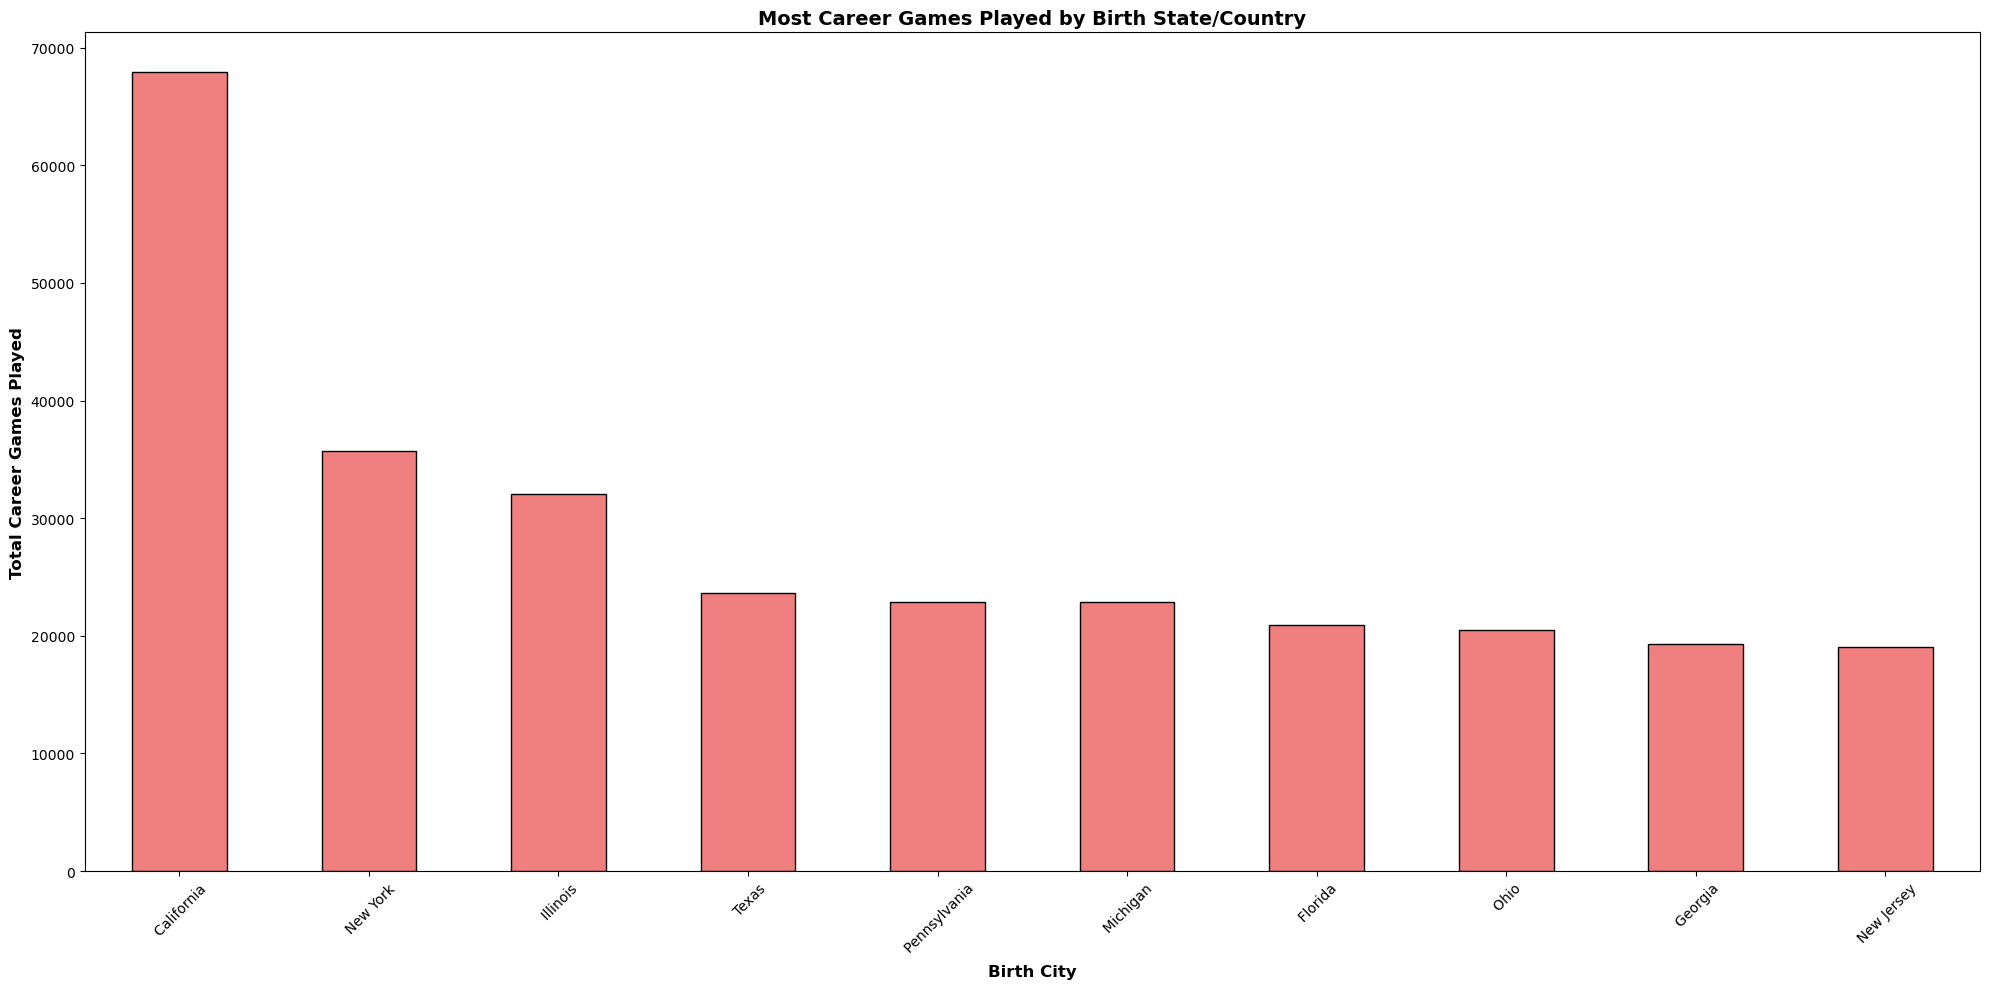

In [102]:
plt.figure(figsize=(20, 10))
total_games_by_country.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Most Career Games Played by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Total Career Games Played', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
games_by_city = full_data.groupby("Birth City")
total_games_by_city = games_by_city["Career Games Played"].sum().sort_values(ascending=False)[:10]
display(total_games_by_city.head())

Birth City
Los Angeles     18485
Chicago         16616
Philadelphia    14518
Detroit         10178
Washington       9770
Name: Career Games Played, dtype: int64

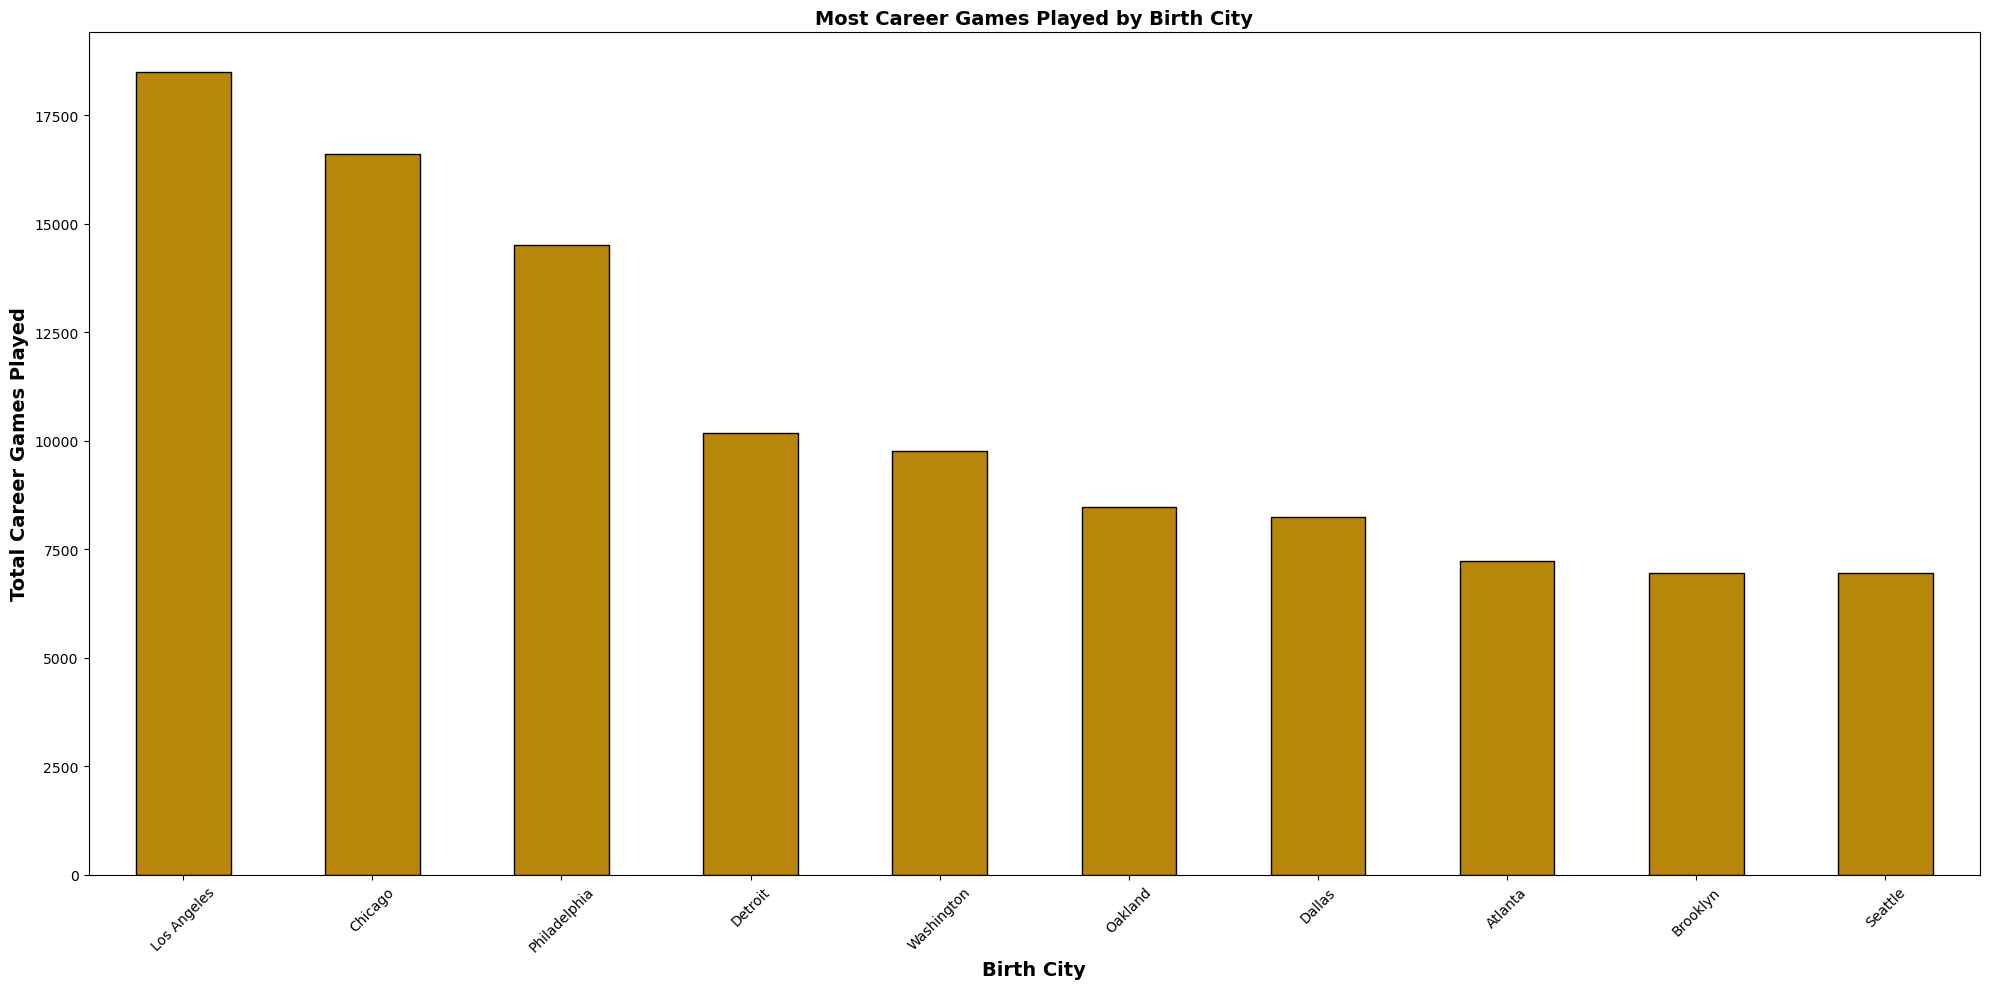

In [104]:
plt.figure(figsize=(20, 10))
total_games_by_city.plot(kind='bar', color='darkgoldenrod', edgecolor='black')
plt.title('Most Career Games Played by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=14, weight='bold')
plt.ylabel('Total Career Games Played', size=14, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as mcolors

In [106]:
# Pull NBA draft CSV
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [107]:
# Pull NBA salary CSV
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [108]:
# Merge data
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07


In [109]:
# Print total number of rows
full_data.count()

_id                            1535
Name                           1535
Month                          1535
Day                            1535
Year                           1535
Position                       1535
College                        1535
Draft Year                     1535
Draft Round                    1535
Draft Pick                     1535
Career Games Played            1535
Career Points Per Game         1535
Total Career Points            1535
Birth City                     1535
Birth State/Country            1532
Total Earnings                 1535
Inflation-Adjusted Earnings    1535
dtype: int64

## What birth month produces the most NBA players?

In [110]:
# Group data by month and sort by highest number of rows
months_data = full_data.groupby(["Month"])
most_players = months_data.size().sort_values(ascending=False)
display(most_players.head())

Month
February     156
March        144
May          143
September    135
June         128
dtype: int64

In [111]:
# Find month with the highest number of players produced
print(f"The month produces the highest number of players is: {most_players.index[0]} with a total of {most_players.iloc[0]} players.")

The month produces the highest number of players is: February with a total of 156 players.


In [112]:
# Sort series by month
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_months_players = most_players.reindex(month_list)

In [113]:
# Create custom format for pie chart labels
def format(data):
    total = sum(data)
    def my_format(pct):
        return "{:.2f}%\n({:.0f})".format(pct, pct * total / 100)
    return my_format

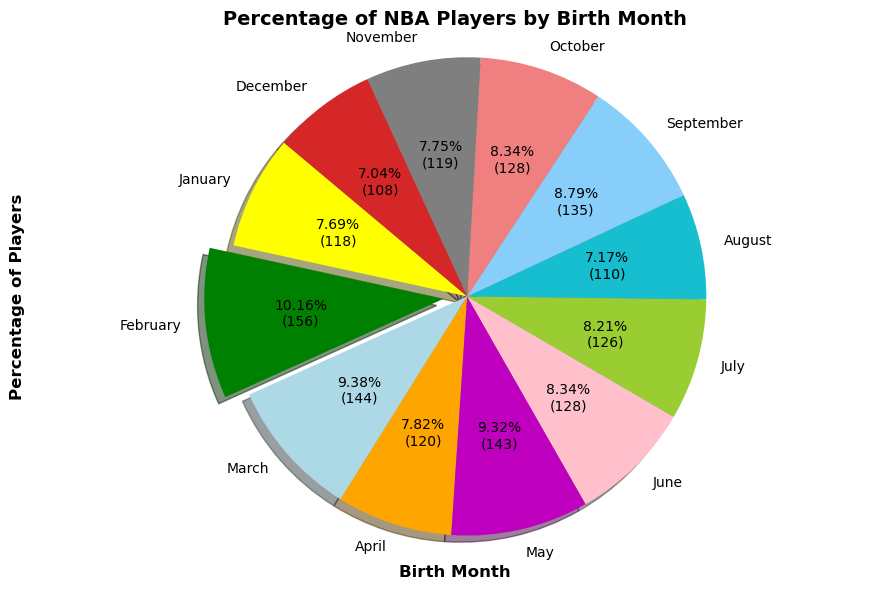

In [114]:
# 1. Percentage of NBA Players by Birth 
fig, ax = plt.subplots(figsize=(9, 6))
#fig, ax = plt.subplots(figsize=(14, 7))
#bar_container = ax.bar(sorted_months_players.index, sorted_months_players, color=mcolors.BASE_COLORS, edgecolor='black')
#ax.bar_label(bar_container, weight='bold', padding=3)

explode = (0,0.1,0,0,0,0,0,0,0,0,0,0)
colors = ["yellow","green","lightblue","orange","m","pink","yellowgreen","tab:cyan","lightskyblue","lightcoral","tab:gray", "tab:red"]
ax.pie(sorted_months_players, labels=sorted_months_players.index, explode=explode, shadow=True, autopct=format(sorted_months_players), startangle=140,
      colors=colors)

plt.axis("equal")
plt.title('Percentage of NBA Players by Birth Month', size=14, weight='bold')
plt.xlabel('Birth Month', size=12, weight='bold')
plt.ylabel('Percentage of Players', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Resources/birth_month_player_numbers.png", bbox_inches='tight')
plt.show()

## Which birth month produces the most #1 draft picks?

In [115]:
# Group data by colleges and sort by highest #1 draft picks
first_picks = full_data.loc[full_data["Draft Pick"] == "1st overall"][["Month", "Draft Pick"]]
first_picks_month_data = first_picks.groupby("Month")
most_picks = first_picks_month_data.count().sort_values(by="Draft Pick", ascending=False).squeeze()
display(most_picks.head())

Month
March       9
April       3
December    3
October     3
January     2
Name: Draft Pick, dtype: int64

In [116]:
# Find month with the highest number of players produced
print(f"The month produces the highest number of players is: {most_picks.index[0]} with a total of {most_picks.iloc[0]} players.")

The month produces the highest number of players is: March with a total of 9 players.


In [117]:
# Sort series by month
sorted_months_picks = most_picks.reindex(month_list)

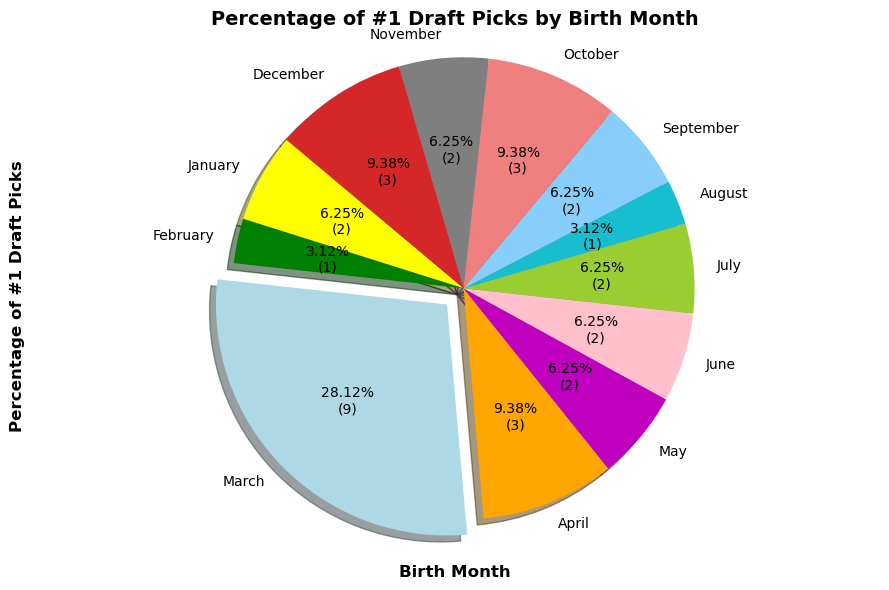

In [118]:
# 2. Percentage of #1 Draft Picks by Birth Month
fig, ax = plt.subplots(figsize=(9, 6))
#fig, ax = plt.subplots(figsize=(14, 7))
#bar_container = ax.bar(sorted_months_picks.index, sorted_months_picks, color=mcolors.TABLEAU_COLORS, edgecolor='black')
#ax.bar_label(bar_container, weight='bold', padding=3)

explode = (0,0,0.1,0,0,0,0,0,0,0,0,0)
ax.pie(sorted_months_picks, labels=sorted_months_picks.index, explode=explode, shadow=True, autopct=format(sorted_months_picks), startangle=140,
      colors=colors)

plt.axis("equal")
plt.title('Percentage of #1 Draft Picks by Birth Month', size=14, weight='bold')
plt.xlabel('Birth Month', size=12, weight='bold')
plt.ylabel('Percentage of #1 Draft Picks', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Resources/birth_month_draft_picks.png", bbox_inches='tight')
plt.show()

## Which birth month produces the highest average career earnings?

In [119]:
month_earnings = months_data["Total Earnings"].mean()
highest_month_earnings = month_earnings.sort_values(ascending=False)
highest_month_earnings.head()

Month
March        3.141049e+07
May          2.952011e+07
June         2.884637e+07
September    2.720196e+07
August       2.673069e+07
Name: Total Earnings, dtype: float64

In [120]:
# Find the birth month with the highest average career earnings
highest_value = "${:,.2f}".format(highest_month_earnings.iloc[0])
print(f"The birth month that produces the highest average earnings is: {highest_month_earnings.index[0]} with a total of {highest_value}")

The birth month that produces the highest average earnings is: March with a total of $31,410,487.40


## Which birth month produces the highest average career earnings adjusted to Sep. 1st 2023 inflation?

In [121]:
month_earnings_adjusted = months_data["Inflation-Adjusted Earnings"].mean()
highest_month_earnings_adjusted = month_earnings_adjusted.sort_values(ascending=False)
display(highest_month_earnings_adjusted.head())

# Find the birth month with the highest average career earnings adjusted to Sep. 1st 2023 inflation
highest_value = "${:,.2f}".format(highest_month_earnings_adjusted.iloc[0])
print(f"The birth month that produces the highest average earnings is: {highest_month_earnings_adjusted.index[0]} with a total of {highest_value}")

Month
March        4.902133e+07
May          4.546450e+07
June         4.365883e+07
September    4.228276e+07
August       4.091444e+07
Name: Inflation-Adjusted Earnings, dtype: float64

The birth month that produces the highest average earnings is: March with a total of $49,021,328.44


In [122]:
# Sort series by month
sorted_month_earnings = month_earnings.reindex(month_list)
sorted_month_earnings_adjusted = month_earnings_adjusted.reindex(month_list)

In [123]:
# Create a helper function to convert "−" into "-" to avoid float-conversion issue
def convert(num):
    if num[0] == "−":
        result = num.replace("−", "-")
    else:
        result = num
    return result

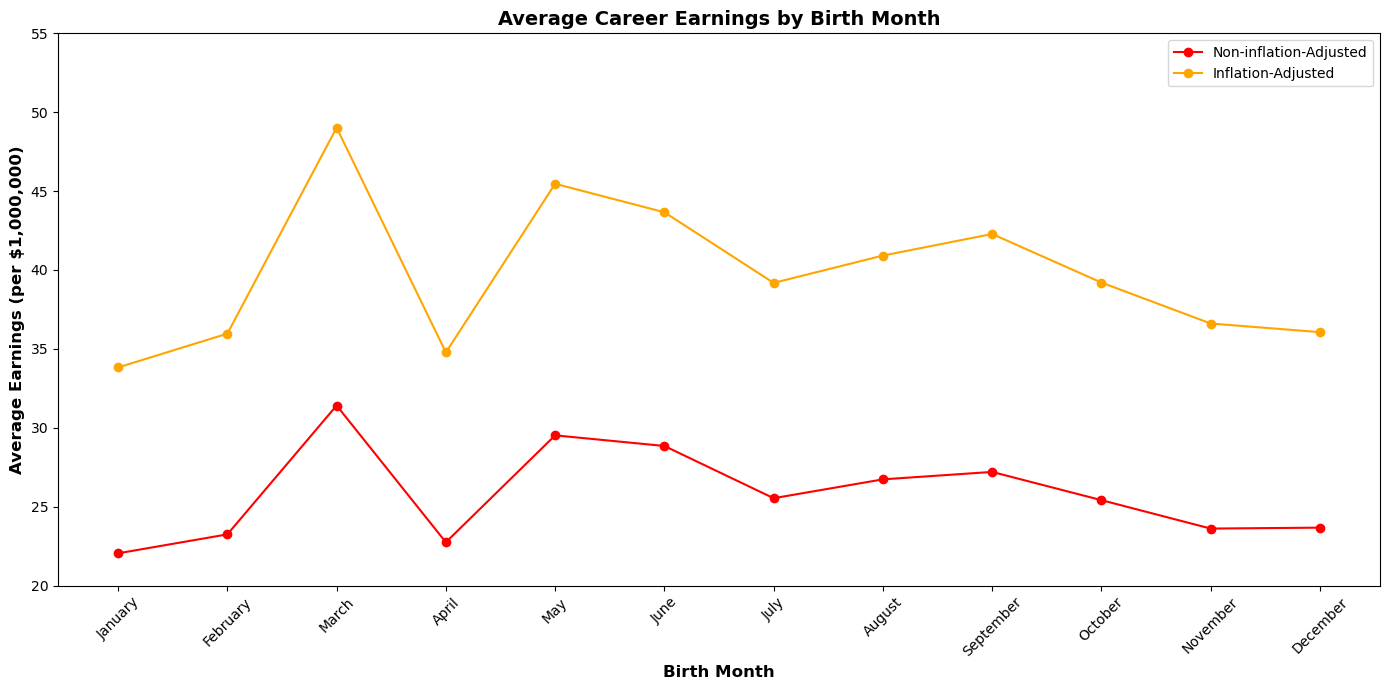

In [124]:
#Average Career Earnings by Birth Month (Non-inflation-Adjusted vs Inflation-Adjusted)
plt.figure(figsize=(14, 7))
sorted_month_earnings.plot(kind='line', marker='o', color='red')
sorted_month_earnings_adjusted.plot(kind='line', marker='o', color='orange')
plt.title('Average Career Earnings by Birth Month', size=14, weight='bold')
plt.xlabel('Birth Month', size=12, weight='bold')
plt.ylabel('Average Earnings (per $1,000,000)', size=12, weight='bold')

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 10) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.xticks(range(12), labels=month_list, rotation=45)
plt.legend(labels = ["Non-inflation-Adjusted", "Inflation-Adjusted"])
plt.tight_layout()
plt.savefig("Resources/birth_month_earnings.png", bbox_inches='tight')
plt.show()

# General NBA Study

In [125]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as mcolors

In [126]:
# Pull NBA draft CSV
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [127]:
# Pull NBA salary CSV
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [128]:
# Merge data
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07


In [129]:
# Print total number of rows
full_data.count()

_id                            1535
Name                           1535
Month                          1535
Day                            1535
Year                           1535
Position                       1535
College                        1535
Draft Year                     1535
Draft Round                    1535
Draft Pick                     1535
Career Games Played            1535
Career Points Per Game         1535
Total Career Points            1535
Birth City                     1535
Birth State/Country            1532
Total Earnings                 1535
Inflation-Adjusted Earnings    1535
dtype: int64

## Distribution of Total Earnings
To check how player earnings are distributed

In [130]:
# Create a helper function to convert "−" into "-" to avoid float-conversion issue
def convert(num):
    if num[0] == "−":
        result = num.replace("−", "-")
    else:
        result = num
    return result

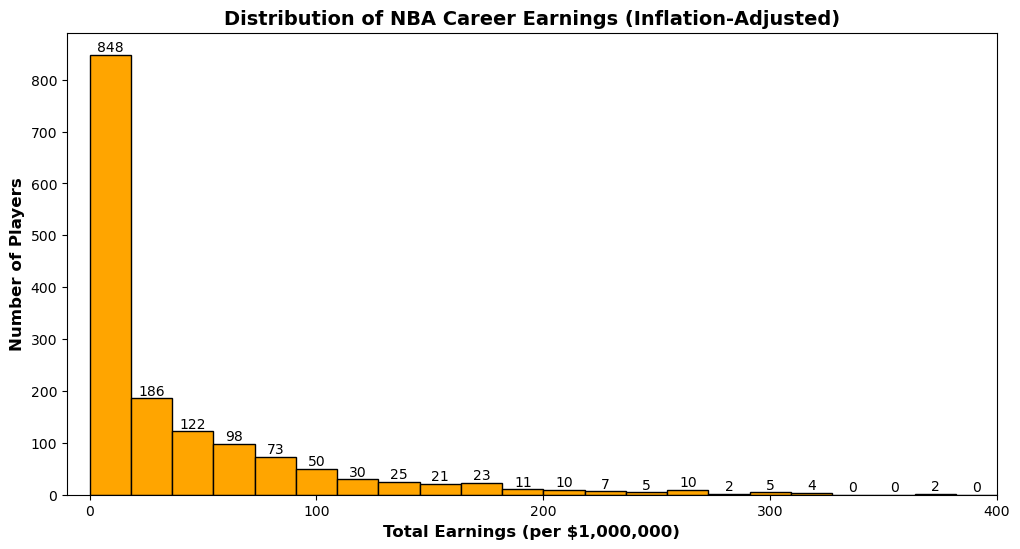

In [131]:
# 1. Distribution of NBA Career Earnings (Inflation-Adjusted)
plt.figure(figsize=(12, 6))
counts, edges, bars = plt.hist(full_data['Inflation-Adjusted Earnings'], bins=30, edgecolor='black', color='orange')
plt.bar_label(bars)
plt.title('Distribution of NBA Career Earnings (Inflation-Adjusted)', size=14, weight='bold')
plt.xlabel('Total Earnings (per $1,000,000)', size=12, weight='bold')
xlocs, xlabels = plt.xticks()
xlabels = [int(float(convert(label.get_text())) * 100) for label in xlabels]
plt.xticks(xlocs, labels=xlabels)
plt.xlim(-10000000, 400000000)
plt.ylabel('Number of Players', size=12, weight='bold')
plt.savefig("Resources/general_earnings.png", bbox_inches='tight')
plt.show()

In [132]:
# Find the mean, median, variance, std. deviation and SEM of total player earnings and inflation-adjusted earnings
describe_df = full_data[["Total Earnings", "Inflation-Adjusted Earnings"]].describe()
earnings_vars = full_data[["Total Earnings", "Inflation-Adjusted Earnings"]].var().squeeze()
earnings_sems = full_data[["Total Earnings", "Inflation-Adjusted Earnings"]].sem().squeeze()

describe_df.loc["mean"] = "$" + describe_df.loc["mean"].map("{:,.2f}".format)
describe_df.loc["25%"] = "$" + describe_df.loc["25%"].map("{:,.2f}".format)
describe_df.loc["50%"] = "$" + describe_df.loc["50%"].map("{:,.2f}".format)
describe_df.loc["75%"] = "$" + describe_df.loc["75%"].map("{:,.2f}".format)
describe_df.loc["std"] = "$" + describe_df.loc["std"].map("{:,.2f}".format)
describe_df.loc["min"] = "$" + describe_df.loc["min"].map("{:,.2f}".format)
describe_df.loc["max"] = "$" + describe_df.loc["max"].map("{:,.2f}".format)
earnings_vars = "$" + earnings_vars.map("{:,.2f}".format)
earnings_sems = "$" + earnings_sems.map("{:,.2f}".format)
                                       
summary_df = pd.DataFrame({
        "Mean Earnings": describe_df.loc["mean"],
        "First Quartile": describe_df.loc["25%"],
        "Median Earnings": describe_df.loc["50%"],
        "Third Quartile": describe_df.loc["75%"],
        "Min Earnings": describe_df.loc["min"],
        "Max Earnings": describe_df.loc["max"],
        "Earnings Variance": earnings_vars,
        "Earnings Std. Dev.": describe_df.loc["std"],
        "Earnings Std. Err": earnings_sems
})

summary_df

,Mean Earnings,First Quartile,Median Earnings,Third Quartile,Min Earnings,Max Earnings,Earnings Variance,Earnings Std. Dev.,Earnings Std. Err
Total Earnings,"$25,956,010.50","$1,857,741.00","$8,025,506.00","$34,342,380.50","$2,706.00","$343,872,398.00","$1,599,699,291,336,443.00","$39,996,240.97","$1,020,857.18"
Inflation-Adjusted Earnings,"$39,960,400.93","$2,978,033.23","$12,583,081.94","$53,068,082.31","$5,069.25","$545,694,490.30","$3,710,286,011,152,364.50","$60,912,117.11","$1,554,710.40"


In [133]:
# Find outliers in total player earnings
total_player_earnings = full_data[["_id", "Name", "Inflation-Adjusted Earnings"]]
quartiles = total_player_earnings["Inflation-Adjusted Earnings"].quantile([.25, .5, .75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq - lowerq
upper_bound = upperq + iqr*1.5,
lower_bound = lowerq - iqr*1.5
print(f"Potential outliers: \n{total_player_earnings.loc[(total_player_earnings['Inflation-Adjusted Earnings'] > upper_bound) | (total_player_earnings['Inflation-Adjusted Earnings'] < lower_bound)]['Name']}")

Potential outliers: 
3       Shareef Abdur-Rahim
19        LaMarcus Aldridge
28                Ray Allen
51          Carmelo Anthony
56           Gilbert Arenas
               ...         
1438           Chris Webber
1446             David West
1449      Russell Westbrook
1469         Deron Williams
1484        Marvin Williams
Name: Name, Length: 127, dtype: object


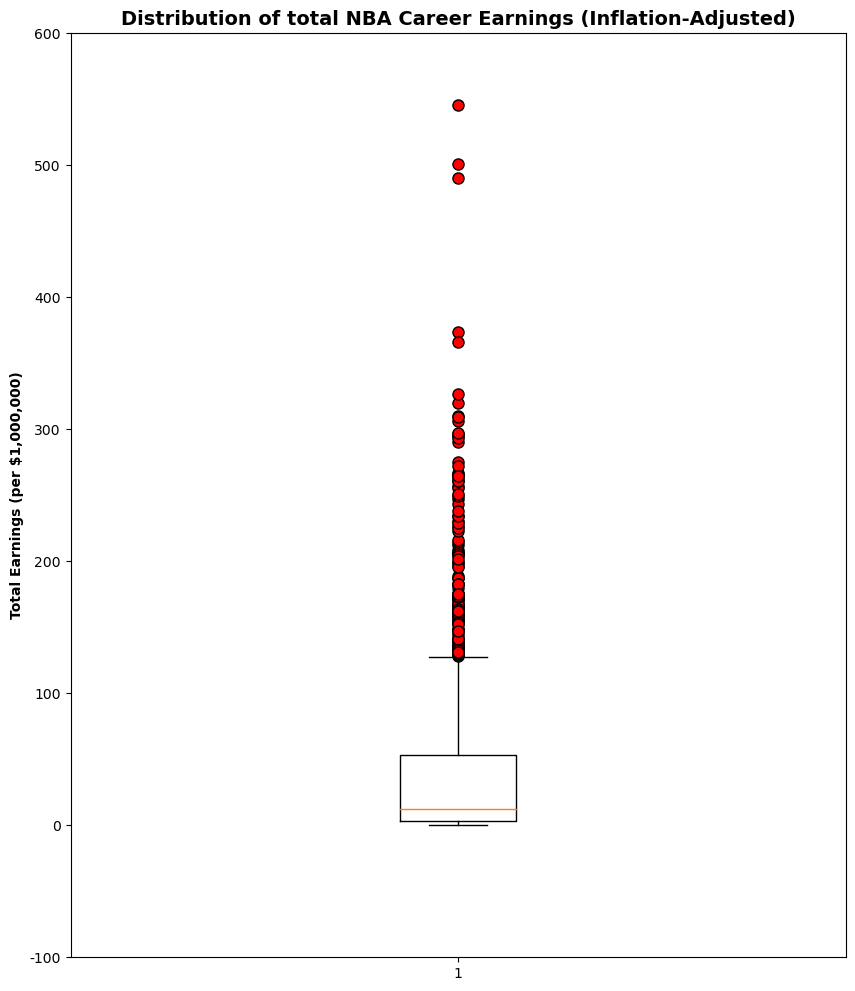

In [134]:
# 2. Generate a box plot that shows the distribution of total NBA career earnings (Inflation-Adjusted)
fig, ax = plt.subplots(figsize=(10, 12))

data = total_player_earnings["Inflation-Adjusted Earnings"]
ax.boxplot(data, flierprops = dict(marker = "o", markerfacecolor = "red", markersize=8))
plt.title("Distribution of total NBA Career Earnings (Inflation-Adjusted)", size=14, weight="bold")
plt.ylabel("Total Earnings (per $1,000,000)", weight="bold")

ylocs, ylabels = plt.yticks()
ylabels = [int(float(convert(label.get_text())) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)
plt.savefig("Resources/general_earnings_outliers.png", bbox_inches='tight')
plt.show()